<center><br> <img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 300px;"></center><br><br>

<img src="https://upload.wikimedia.org/wikipedia/en/archive/c/cc/20180621135549%21Vodafone_2017_logo.svg" style="width: 200px;margin-top:90px;margin-bottom:100px;" align="left">
   <div style= "font-size: 28px;font-weight:bold;margin-top:20px;margin-bottom:20px;margin-left:360px;margin-right:150px; line-height: 1.1;color:#F91701;"><center>Análise de Sentimentos nas Redes Sociais | Vodafone</center></div>
   <div style= "font-size: 17px;font-weight:bold;"><center>Projeto Final Aplicado em Ciência de Dados</center></div>
   <div><center><b>Orientador:</b> Nuno Santos (ISCTE-IUL) </center></div>
   <div><center><b>Cliente:</b> Carlos Santos (Vodafone) </center></div>
 <br>
    <div><center>André Silvestre Nº104532 </center></div>
    <div><center>Eliane Gabriel Nº103303 <b>|</b> Maria João Lourenço Nº104716 </center></div>
    <div><center>Margarida Pereira Nº105877 <b>|</b> Umeima Mahomed Nº99239</center></div>
    <br>
    <div><center><b>CDC1</b> & <b>CDC2</b></center></div>
 <br>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

# Índice


<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li>
    <span style="font-weight: normal;">
      <a href="">Business Understanding</a>
    </span> 
  </li> 
    
   <li>
    <span style="font-weight: normal;">
      <a href="">Data Understanding</a>
    </span> 
  </li> 
    
  <li>
    <span style="font-weight: normal;">
      <a href="#2">Data Preparation</a>
    </span> 
    <ol style="list-style-type:decimal;">
      <li><span style="font-weight: normal;"><a href="#2.4">Pré-Processamento de Texto</a></span></li>
    </ol>
  </li>
  <li>
    <span style = "font-weight: normal;">
        <a href="#3">Modeling</a>
    </span>
    <ol style="list-style-type:decimal;">
      <li><span style="font-weight: normal;"><a href="#4.1">Sentiment Analysis</a></span></li>
      <li><span style="font-weight: normal;"><a href="#4.2">Topic Analysis</a></span></li>
    </ol>
   </li>
  <li><span style = "font-weight: normal;"><a href="#5">Evaluation</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#6">Deployment [Dashboard]</a></span></li>
</ol>

<br>
<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>
<br>

In [1]:
from IPython.core.display import HTML
HTML("""<style>ol > li::marker {font-weight: bold;font-size: 15px;}
    .output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

In [2]:
# Fonte: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    html_str = ''
    html_str += f'<h1 style="text-align: center; margin-bottom: -10px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex; justify-content: center; align-items: center;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555; margin-bottom: 10px">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## 📚 Import das Bibliotecas

In [3]:
# Bibliotecas que vamos usar no Projeto
import os                # Operating System
from tqdm import tqdm    # Barra de Progresso

# Para dados
import pandas as pd
import numpy as np
import json
import re
import time
import datetime
import unidecode
from tqdm import tqdm                        # Barra de Progresso
pd.set_option('display.max_colwidth', None)  # Visualizar a informação toda
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_colwidth') 

# Para gráficos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import seaborn as sns
import datetime

# -------------------- Text Mining -------------------
import collections
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
import spacy
import string
pd.options.mode.chained_assignment = None
import swifter

# ---------------- Sentiment/Topic Analysis ----------------
from tqdm.auto import tqdm     # Barra de Progressos em pipelines
tqdm.pandas()

# Estilo dos Gráficos    
plt.style.use('ggplot')
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")

# Semente para reprodutibilidade
import random
random.seed(123)

In [4]:
# Confirmar o environment do Anaconda
import subprocess
print(subprocess.check_output(["conda", "info", "--env"], universal_newlines=True))

# conda environments:
#
base                  *  C:\Anaconda3
pfacd                    C:\Anaconda3\envs\pfacd




---

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>3 | Data Preparation</b></h1></center>
</div>

## 🧮 Importar as Bases de Dados dos Posts, Comentários e Users

In [5]:
Facebook_Posts = pd.read_csv('Datasets_Vodafone/Facebook_Posts.txt', sep='\t', encoding='utf-8')
Facebook_Comments = pd.read_csv('Datasets_Vodafone/Facebook_Comments.txt', sep='\t', encoding='utf-8')
Facebook_Users = pd.read_csv('Datasets_Vodafone/Facebook_Users.txt', sep='\t', encoding='utf-8')

# Garantir que as colunas 'post_id' e 'page' e 'user_link' são do tipo str
Facebook_Users['user_link'] = Facebook_Users['user_link'].astype(str)

Facebook_Comments['post_id'] = Facebook_Comments['post_id'].astype(str)
Facebook_Comments['page'] = Facebook_Comments['page'].astype(str)

Facebook_Posts['post_id'] = Facebook_Posts['post_id'].astype(str)
Facebook_Posts['page'] = Facebook_Posts['page'].astype(str)

In [6]:
# Juntar tabelas e restringir aos anos em estudo
Facebook_Posts_Comments = pd.merge(Facebook_Comments, Facebook_Posts, how='outer', on=['post_id', 'page'])

# Filtrar o DataFrame Facebook_Posts para obter os posts a partir de 2019
Facebook_Posts = Facebook_Posts[Facebook_Posts['post_year'] >= 2019]

# Filtrar o DataFrame Facebook_Comments para obter os posts a partir de 2019
Facebook_Comments = Facebook_Posts_Comments[Facebook_Posts_Comments['post_year'] >= 2019]

In [7]:
print("\033[1mNº de Publicações entre 2019-2024:\033[0m {:>12}".format(len(Facebook_Posts)))
print("\033[1mNº de Comentários entre 2019-2024:\033[0m {:>14}".format(len(Facebook_Comments)))
print("\033[1mNº de Utilizadores Únicos entre 2019-2024:\033[0m {:>3}".format(len(
    Facebook_Comments[~Facebook_Comments.duplicated(subset=['user_link'])])))

Nº de Publicações entre 2019-2024:         3553
Nº de Comentários entre 2019-2024:         200448
Nº de Utilizadores Únicos entre 2019-2024: 114198


# <a class='anchor' id='2.4'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent; 
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #A30000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #A30000;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>Pré-Processamento de Texto</b></h2></center>
</div>

In [8]:
# Verificar posts sem texto
print('\033[1mNº de Posts a eliminar:\033[0m', len(Facebook_Posts[Facebook_Posts['post_text'].isna()]),
      '(', round(len(Facebook_Posts[Facebook_Posts['post_text'].isna()])/len(Facebook_Posts)*100, 2),'%)')

Facebook_Posts['post_text'] = Facebook_Posts['post_text'].fillna(' ')

Nº de Posts a eliminar: 59 ( 1.66 %)


> Não vamos eliminar pq se não elimina tmb os comentários associados.

In [9]:
# Verificar comentários sem texto [com emojis/só fotos/...]
print('\033[1mNº de Comentários a eliminar:\033[0m', len(Facebook_Comments[Facebook_Comments['comment_text'].isna()]),
      '(', round(len(Facebook_Comments[Facebook_Comments['comment_text'].isna()])/len(Facebook_Comments)*100, 2),'%)')

# Eliminar NAs
Facebook_Comments.dropna(subset=['comment_text'], inplace=True)

# Verificar
print('\033[1mNº de Comentários a eliminar:\033[0m', len(Facebook_Comments[Facebook_Comments['comment_text'].isna()]),
      '(', round(len(Facebook_Comments[Facebook_Comments['comment_text'].isna()])/len(Facebook_Comments)*100, 2),'%)')

Nº de Comentários a eliminar: 6194 ( 3.09 %)
Nº de Comentários a eliminar: 0 ( 0.0 %)


In [10]:
# Verificar todos os DataFrames quanto à presença do caractere '�'
for df_name, df in zip(['Facebook_Posts', 'Facebook_Comments'], [Facebook_Posts, Facebook_Comments]):
    print(f"\033[1mVerificando o DataFrame {df_name}...\033[0m")
    for column in df.columns:
        contains_character = df[column].astype(str).str.contains('�', na=False).any()
        if contains_character:
            print(f"Caractere '�' encontrado na coluna '{column}' do DataFrame {df_name}")

Verificando o DataFrame Facebook_Posts...
Verificando o DataFrame Facebook_Comments...
Caractere '�' encontrado na coluna 'comment_text' do DataFrame Facebook_Comments


In [11]:
# Verificar as linhas com caracter especial '�'
CE_Comment_Text = Facebook_Comments[Facebook_Comments['comment_text'].str.contains('�')]
print('\033[1mTotal Observações de Comentários com Caracter Especial = \033[0m', len(CE_Comment_Text),
     '(',round(len(CE_Comment_Text)/len(Facebook_Comments)*100,5),'%)')
# CE_Comment_Text - Verificou-se que também se encontrava assim no comentário original

# Remover os caracteres '�' substituindo-os por uma string vazia ''
Facebook_Comments['comment_text'] = Facebook_Comments['comment_text'].str.replace('�', '')

# Verificar se a substituição foi bem-sucedida
print('\033[1mTotal Observações de Comentários com Caracter Especial = \033[0m', 
      len(Facebook_Comments[Facebook_Comments['comment_text'].str.contains('�')]))

Total Observações de Comentários com Caracter Especial =  15 ( 0.00772 %)
Total Observações de Comentários com Caracter Especial =  0


In [12]:
# Redefinir o nº de linhas
Facebook_Posts = Facebook_Posts.reset_index(drop=True)
Facebook_Comments = Facebook_Comments.reset_index(drop=True)

---

In [13]:
# Verificar as linhas a expressão "… Ver mais"
VM_Post_Text = Facebook_Posts[Facebook_Posts['post_text'].str.contains('… Ver mais')]
print('\033[1mTotal Observações com "… Ver mais" = \033[0m', len(VM_Post_Text),
     '(',round(len(VM_Post_Text)/len(Facebook_Posts)*100,1),'%)')
# CE_Post_Text - Verificou-se que também se encontrava assim no comentário original

Total Observações com "… Ver mais" =  138 ( 3.9 %)


In [14]:
# Verificar as linhas a expressão "… Ver mais"
VM_Comment_Text = Facebook_Comments[Facebook_Comments['comment_text'].str.contains('… Ver mais')]
print('\033[1mTotal Observações com "… Ver mais" = \033[0m', len(VM_Comment_Text),
     '(',round(len(VM_Comment_Text)/len(Facebook_Comments)*100,1),'%)')
# CE_Comment_Text - Verificou-se que também se encontrava assim no comentário original

Total Observações com "… Ver mais" =  6734 ( 3.5 %)


In [15]:
# Apagar a expressão "… Ver mais" ============= POSTS
Facebook_Posts['post_text'] = Facebook_Posts['post_text'].str.replace('… Ver mais', '')

# Verificar se a substituição foi bem-sucedida
print('\033[1mTotal Observações com "… Ver mais" = \033[0m', 
      len(Facebook_Posts[Facebook_Posts['post_text'].str.contains('… Ver mais')]))

Total Observações com "… Ver mais" =  0


In [16]:
# Apagar a expressão "… Ver mais" ============= COMMENTS
Facebook_Comments['comment_text'] = Facebook_Comments['comment_text'].str.replace('… Ver mais', '')

# Verificar se a substituição foi bem-sucedida
print('\033[1mTotal Observações com "… Ver mais" = \033[0m', 
      len(Facebook_Comments[Facebook_Comments['comment_text'].str.contains('… Ver mais')]))

Total Observações com "… Ver mais" =  0


---

### 💬 Identificação da Linguagem dos Texto

In [17]:
# !pip install lingua-language-detector

In [18]:
from lingua import Language, LanguageDetectorBuilder
languages = [Language.ENGLISH, Language.PORTUGUESE]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

# Função para identificar o idioma do texto
def detect_language(text):
    try:
        return detector.detect_language_of(text)
    except:
        return 'Unknown'
    
# Identificar idioma para 'post_text'
Facebook_Posts['post_language'] = Facebook_Posts['post_text'].swifter.apply(detect_language)

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

In [19]:
# Identificar idioma para 'comment_text'
Facebook_Comments['comment_language'] = Facebook_Comments['comment_text'].swifter.apply(detect_language)

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [20]:
# Frequência de linguagens dos 'post_text' e 'comment_language'
post_lang_freq = Facebook_Posts['post_language'].value_counts()
comments_lang_freq = Facebook_Comments['comment_language'].value_counts().fillna(0).astype(int)

# Tabela de frequência absoluta e relativa
lang_freq = pd.DataFrame({'Publicações (n)': post_lang_freq,
                          'Publicações (%)': round(post_lang_freq / post_lang_freq.sum()*100,1),
                          'Comentários (n)': comments_lang_freq,
                          'Comentários (%)':round(comments_lang_freq / comments_lang_freq.sum()*100,1)})
lang_freq.index.name = 'Linguagens'
lang_freq.rename(index={Language.PORTUGUESE: 'Português', Language.ENGLISH: 'Inglês', 'Unknown':'NI'}, inplace=True)
lang_freq = lang_freq.reindex(index=['Português', 'Inglês', 'NI']) # NI = Não Identificado
lang_freq = lang_freq.fillna(0)
lang_freq['Publicações (n)'] = lang_freq['Publicações (n)'].astype(int)
lang_freq['Comentários (n)'] = lang_freq['Comentários (n)'].astype(int)
lang_freq

Publicações (n)  Publicações (%)  Comentários (n)  Comentários (%)
Linguagens                                                                    
Português              3480             99.6           186685             96.6
Inglês                   14              0.4             6484              3.4
NI                        0              0.0                0              0.0

In [21]:
# Facebook_Posts[(Facebook_Posts['post_language'] != Language.PORTUGUESE) &
#                (Facebook_Posts['post_language'] != 'Unknown')
#               ][['post_text', 'post_language']]

In [22]:
# Facebook_Comments[Facebook_Comments['comment_language'] == Language.ENGLISH]

---

### 📚 Tradução do Texto | HuggingFace [Translation Pipeline](https://huggingface.co/transformers/main_classes/pipelines.html#transformers.TranslationPipeline)

**Fonte:** Workshop *Hands-on Transformers: Fine-tune your own BERT and GPT* (Moritz Laurer from HuggingFace) [Github Code](https://github.com/MoritzLaurer/summer-school-transformers-2023/blob/main/)

**Machine Translation**

* Open source machine translation (MT) models enable you to translate between many different languages without Google Translate.
* [University of Helsinki](https://huggingface.co/Helsinki-NLP) uploaded models for more than 1000 language pairs to the Hugging Face hub
* [Facebook AI](https://huggingface.co/models?search=facebook+m2m) open-sourced several multi-lingual models
* The [EasyNMT library](https://github.com/UKPLab/EasyNMT), provides an easy wrapper for all these models
* Most machine translation models translate between two languages in one direction (e.g. German to English, but not English to German), some can translate in multiple directions.

In [21]:
# !pip install transformers
# The Transformers library from Hugging Face
# !pip install sentencepiece
# optional tokeniser, required for some models. e.g. machine translation
# running large models with accelerate https://huggingface.co/blog/accelerate-large-models
# NOTE: we need to restart the runtime after installing accelerate
# !pip install accelerate
############# https://pytorch.org/ -> Instalar

In [16]:
# automatically chose CPU or GPU for inference, depending on your hardware
import torch
device = torch.cuda.current_device() if torch.cuda.is_available() else -1
# -1 == CPU ; 0 == GPU
print(device)

0


In [17]:
import os
os.environ['HF_HOME'] = 'C:/HuggingFace'               #   -----------> Caso de Erro -> Alterar a paste de '.cache'
os.environ['HF_DATASETS_CACHE'] = 'C:/HuggingFace'
os.environ['TRANSFORMERS_CACHE'] = 'C:/HuggingFace'

In [22]:
# ```Python
from transformers import pipeline

# translation pipeline docs: https://huggingface.co/transformers/main_classes/pipelines.html#transformers.TranslationPipeline
pipeline_translate = pipeline("translation",                   # Tipo de pipeline
                              model="facebook/m2m100_418M",    # Modelo
                              tokenizer="facebook/m2m100_418M",
                              # framework='pt',                  # 'pt' for PyTorch or 'tf' for TensorFlow
                              device=device,                    # -1 -> CPU | 0 -> CUDA [NVIDIA]
                              batch_size=8
                             )

# Função para traduzir um texto
def translate_text(text):
    # Aplicar o pipeline de tradução ao texto
    translated_text = pipeline_translate(text, src_lang="pt", tgt_lang="en")[0]["translation_text"]
    return translated_text
# ```

In [23]:
# Frase Teste
text_example = "As operadoras de telecomunicações oferecem uma gama de serviços de comunicação."
translate_text(text_example)

'Telecommunications operators offer a range of communication services.'

In [25]:
# # Aplicar a tradução aos posts e comentários do Facebook
# Facebook_Posts['post_text_english'] = Facebook_Posts['post_text'].progress_apply(translate_text)

In [26]:
# # Aplicar a tradução aos posts e comentários do Facebook
# Facebook_Comments['comment_text_english'] = Facebook_Comments['comment_text'].progress_apply(translate_text)

```Python

# Aplicar a tradução aos posts e comentários do Facebook
Facebook_Posts['post_text_english'] = Facebook_Posts['post_text'].progress_apply(translate_text)

# Salvar a nova coluna como um arquivo CSV
Facebook_Posts[['post_id', 'post_text_english']].to_csv('Datasets_Vodafone/TextMining/post_text_english.csv', encoding='utf-8', index=False)

# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
post_text_english = pd.read_csv('post_text_english.csv')
Facebook_Posts = Facebook_Posts.merge(post_text_english, on='post_id', how='left')
```

```Python
# Aplicar a tradução aos posts e comentários do Facebook
Facebook_Comments['comment_text_english'] = Facebook_Comments['comment_text'].progress_apply(translate_text)

# Salvar a nova coluna como um arquivo CSV
Facebook_Comments[['comment_id', 'comment_text_english']].to_csv('Datasets_Vodafone/TextMining/comment_text_english.csv', encoding='utf-8', index=False)

# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
comment_text_english = pd.read_csv('comment_text_english.csv')
Facebook_Comments = Facebook_Comments.merge(comment_text_english, on='comment_id', how='left')
```

> Por questões de **eficiência** e **possíveis perdas de informação** útil à análise de sentimentos no texto, ***optou-se por não traduzir o texto*** e utilizar o original na língua que o utilizador comentou

---

## 🛠️ Pré-Processamento do Texto

**Fonte:** https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing


> **NLTK** is the most famous Python Natural Language Processing Toolkit.

Algumas das etapas comuns de pré-processamento / limpeza de texto são:

* *Lower casing*             ✅
* *Removal of Punctuations*  ✅
* *Removal of URLs*          ✅
* *Removal Extra Spaces*     ✅
* *Chat words conversion*    ✅
* *Spelling correction*      ✅

Estes são os diferentes tipos de etapas de pré-processamento de texto que se pode efetuar nos dados de texto. Mas não é necessário fazer tudo isto sempre. É importante escolher cuidadosamente as etapas de pré-processamento com base no nosso caso de utilização, uma vez que isso também desempenha um papel importante.

### Lower Casing

***Lower Casing*** é uma técnica comum de pré-processamento de texto. A ideia é converter o texto de *input* para o mesmo formato, de modo a que `'texto'`, `'Texto'` e `'TEXTO'` sejam tratados da mesma forma.

Isto é mais útil para as técnicas de caraterização do texto, como a frequência e o `tfidf`, uma vez que ajuda a combinar as mesmas palavras, reduzindo assim a duplicação e obtendo contagens/valores `tfidf` correctos.

Por padrão, o lower casing é feito pela maioria dos *vecotirzers* e *tokenizers* modernos, como o **`sklearn`** `TfidfVectorizer` e o `Keras Tokenizer`. Por isso, é preciso de os definir como falsos conforme necessário, dependendo do caso de utilização.

---

In [23]:
Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text'].str.lower()
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text'].str.lower()

In [24]:
Facebook_Posts[['post_text','post_text_clean']]
Facebook_Comments[['comment_text','comment_text_clean']]

comment_text  \
0                                                                                                                                                                                                                                  Boa noite força sucesso sempre Amém gratidão sempre   
1                                                                                                                                                                                                                                                                           O roxo ...   
2                                                                                                                                                                                                                                                                             Vermelho   
3                                                                                                                                                                                                                                                                                   HU   
4                                                                                          Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.   
...                                                                                                                                                                                                                                                                                ...   
194249                                                                                                                                                                                                                        Claro , caso contrário era pagar para inúmeras situações   
194250                                                                                                                                                                          Eu tenho o Pacote TDT, telemóvel de carregamento livre, e net sem fidelização, a mim, não me F......em   
194251                                                                                                      Par a mim compensa. Pago 20euros extra de 2 telefones. Tendo em conta temos direito a net fora de casa e chamadas ilimitadas. Antes os 20 euros nadava para 1 telefone....   
194252  Eu pessoalmente tenho os telamóveis separados do pacote de TV e NET em casa tenho nos telemoveis Vodafone e TV e NET tenho a NÓS estou satisfeito com os valores mas estou a pensar sériamente consultar a DIGI quando o serviço deste operador estiver disponivel vamos ver .   
194253                                         Quando é que a CNN P deixa de conseguir aceder à guerra fraticida em vez de o fazer com a "guerra" que este sistema político vigente cria diáriamente aos mais humildes desprotegidos e pobres Concidadãos e Concidadãs entre outros!!!   

                                                                                                                                                                                                                                                                    comment_text_clean  
0                                                                                                                                                                                                                                  boa noite força sucesso sempre amém gratidão sempre  
1                                                                                                                                                                                                                                                                           o roxo ...  
2                                     

### Removal of URLs

O próximo passo do pré-processamento é remover quaisquer URLs presentes nos dados. Por exemplo, se se estiver a fazer uma análise do Twitter, é muito provável que o tweet contenha algum URL. É provável que se precise de os remover para a análise posterior. 

In [25]:
def remove_urls(text):
    if text:
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        return url_pattern.sub(r'', text)
    else:
        pass

# Teste da Função
text = "Boa tarde https://www.siteexemplo.com/"
print('\033[1mAntes:\033[0m', text)
print('\033[1mDepois:\033[0m', remove_urls(text))

Antes: Boa tarde https://www.siteexemplo.com/
Depois: Boa tarde 


In [26]:
# Aplicar ao dataset
Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text_clean'].swifter.apply(lambda text: remove_urls(text))
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text_clean'].swifter.apply(lambda text: remove_urls(text))

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [27]:
Facebook_Posts[['post_text','post_text_clean']]
Facebook_Comments[['comment_text','comment_text_clean']]

comment_text  \
0                                                                                                                                                                                                                                  Boa noite força sucesso sempre Amém gratidão sempre   
1                                                                                                                                                                                                                                                                           O roxo ...   
2                                                                                                                                                                                                                                                                             Vermelho   
3                                                                                                                                                                                                                                                                                   HU   
4                                                                                          Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.   
...                                                                                                                                                                                                                                                                                ...   
194249                                                                                                                                                                                                                        Claro , caso contrário era pagar para inúmeras situações   
194250                                                                                                                                                                          Eu tenho o Pacote TDT, telemóvel de carregamento livre, e net sem fidelização, a mim, não me F......em   
194251                                                                                                      Par a mim compensa. Pago 20euros extra de 2 telefones. Tendo em conta temos direito a net fora de casa e chamadas ilimitadas. Antes os 20 euros nadava para 1 telefone....   
194252  Eu pessoalmente tenho os telamóveis separados do pacote de TV e NET em casa tenho nos telemoveis Vodafone e TV e NET tenho a NÓS estou satisfeito com os valores mas estou a pensar sériamente consultar a DIGI quando o serviço deste operador estiver disponivel vamos ver .   
194253                                         Quando é que a CNN P deixa de conseguir aceder à guerra fraticida em vez de o fazer com a "guerra" que este sistema político vigente cria diáriamente aos mais humildes desprotegidos e pobres Concidadãos e Concidadãs entre outros!!!   

                                                                                                                                                                                                                                                                    comment_text_clean  
0                                                                                                                                                                                                                                  boa noite força sucesso sempre amém gratidão sempre  
1                                                                                                                                                                                                                                                                           o roxo ...  
2                                     

---

### Removal of Punctuations

Uma outra técnica comum de pré-processamento de texto consiste em remover as pontuações dos dados de texto. Trata-se, mais uma vez, de um processo de normalização do texto que ajudará a tratar 'Olá' e 'Olá!' da mesma forma.

Também é preciso escolher cuidadosamente a lista de pontuações a excluir, dependendo do caso de utilização. Por exemplo, o `string.punctuation` em python contém os seguintes símbolos de pontuação:

`!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

Pode-se acrescentar ou retirar mais pontuações consoante as necessidades.

---

In [28]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    if text:
        """Custom function to remove the punctuation"""
        return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    else:
        pass

# Aplicar ao dataset
Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text_clean'].swifter.apply(lambda text: remove_punctuation(text))
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text_clean'].swifter.apply(lambda text: remove_punctuation(text))

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [29]:
Facebook_Posts[['post_text','post_text_clean']]
Facebook_Comments[['comment_text','comment_text_clean']]

comment_text  \
0                                                                                                                                                                                                                                  Boa noite força sucesso sempre Amém gratidão sempre   
1                                                                                                                                                                                                                                                                           O roxo ...   
2                                                                                                                                                                                                                                                                             Vermelho   
3                                                                                                                                                                                                                                                                                   HU   
4                                                                                          Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.   
...                                                                                                                                                                                                                                                                                ...   
194249                                                                                                                                                                                                                        Claro , caso contrário era pagar para inúmeras situações   
194250                                                                                                                                                                          Eu tenho o Pacote TDT, telemóvel de carregamento livre, e net sem fidelização, a mim, não me F......em   
194251                                                                                                      Par a mim compensa. Pago 20euros extra de 2 telefones. Tendo em conta temos direito a net fora de casa e chamadas ilimitadas. Antes os 20 euros nadava para 1 telefone....   
194252  Eu pessoalmente tenho os telamóveis separados do pacote de TV e NET em casa tenho nos telemoveis Vodafone e TV e NET tenho a NÓS estou satisfeito com os valores mas estou a pensar sériamente consultar a DIGI quando o serviço deste operador estiver disponivel vamos ver .   
194253                                         Quando é que a CNN P deixa de conseguir aceder à guerra fraticida em vez de o fazer com a "guerra" que este sistema político vigente cria diáriamente aos mais humildes desprotegidos e pobres Concidadãos e Concidadãs entre outros!!!   

                                                                                                                                                                                                                                                                   comment_text_clean  
0                                                                                                                                                                                                                                 boa noite força sucesso sempre amém gratidão sempre  
1                                                                                                                                                                                                                                                                             o roxo   
2                                        

---

### Removal Extra Spaces

A fase seguinte envolve retirar espaços extra que possam estar entre as palavras de uma frase. Para isso, vai ser criada a seguinte função: 

In [30]:
def remove_extra_spaces(text):
    if text:
        return re.sub(r'\s+', ' ', text)

# Teste
sentence = "Isso   é   um   exemplo    com    espaços   extra."
print("\033[1mAntes:\033[0m", sentence)
print("\033[1mDepois:\033[0m", remove_extra_spaces(sentence))

# Remover espaços | Aplicar ao dataset
Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text_clean'].swifter.apply(lambda text: remove_extra_spaces(text))
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text_clean'].swifter.apply(lambda text: remove_extra_spaces(text))

Antes: Isso   é   um   exemplo    com    espaços   extra.
Depois: Isso é um exemplo com espaços extra.


Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [31]:
Facebook_Posts[['post_text','post_text_clean']]
Facebook_Comments[['comment_text','comment_text_clean']]

comment_text  \
0                                                                                                                                                                                                                                  Boa noite força sucesso sempre Amém gratidão sempre   
1                                                                                                                                                                                                                                                                           O roxo ...   
2                                                                                                                                                                                                                                                                             Vermelho   
3                                                                                                                                                                                                                                                                                   HU   
4                                                                                          Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.   
...                                                                                                                                                                                                                                                                                ...   
194249                                                                                                                                                                                                                        Claro , caso contrário era pagar para inúmeras situações   
194250                                                                                                                                                                          Eu tenho o Pacote TDT, telemóvel de carregamento livre, e net sem fidelização, a mim, não me F......em   
194251                                                                                                      Par a mim compensa. Pago 20euros extra de 2 telefones. Tendo em conta temos direito a net fora de casa e chamadas ilimitadas. Antes os 20 euros nadava para 1 telefone....   
194252  Eu pessoalmente tenho os telamóveis separados do pacote de TV e NET em casa tenho nos telemoveis Vodafone e TV e NET tenho a NÓS estou satisfeito com os valores mas estou a pensar sériamente consultar a DIGI quando o serviço deste operador estiver disponivel vamos ver .   
194253                                         Quando é que a CNN P deixa de conseguir aceder à guerra fraticida em vez de o fazer com a "guerra" que este sistema político vigente cria diáriamente aos mais humildes desprotegidos e pobres Concidadãos e Concidadãs entre outros!!!   

                                                                                                                                                                                                                                                                   comment_text_clean  
0                                                                                                                                                                                                                                 boa noite força sucesso sempre amém gratidão sempre  
1                                                                                                                                                                                                                                                                             o roxo   
2                                        

---

### Chat Words Conversion

Este é um passo importante de pré-processamento de texto se se estiver a lidar com dados de conversação. Os utilizadores usam muitas palavras abreviadas no chat e, por isso, pode ser útil expandir essas palavras para fins de análise. 

Lista de palavras de gíria inglesas de ***chat*** neste [Repositório](https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt).

In [32]:
#!pip install deep_translator ---- Caso não usássemos o pipeline('translation')

In [33]:
# Fonte: https://medium.com/analytics-vidhya/how-to-translate-text-with-python-9d203139dcf5
from deep_translator import GoogleTranslator

to_translate = 'I want to translate this text'
print("\033[1mAntes:\033[0m", to_translate)
print("\033[1mDepois:\033[0m", GoogleTranslator(source='english', target='portuguese').translate(to_translate))

Antes: I want to translate this text
Depois: Eu quero traduzir este texto


In [34]:
# # Função para traduzir um texto
# def translate_text_pt(text):
#     # Aplicar o pipeline de tradução ao texto
#     translated_text = pipeline_translate(text, src_lang="en", tgt_lang="pt")[0]["translation_text"]
#     return translated_text

In [35]:
# print("\033[1mCom o pipeline:\033[0m", translate_text_pt(to_translate))

In [36]:
file = open('Datasets_Vodafone/Auxiliares/abreviaturas_inglesas.txt','r', encoding='utf-8')
chat_words_str_en = file.read()
file.close()

chat_words_map_dict_en = {}
chat_words_list_en = []
for line in chat_words_str_en.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list_en.append(cw)
        chat_words_map_dict_en[cw] = GoogleTranslator(source='english', target='portuguese').translate(cw_expanded.lower())
        # chat_words_map_dict_en[cw] = translate_text_pt(cw_expanded.lower())
chat_words_list_en = set(chat_words_list_en)
# chat_words_map_dict_en

In [37]:
def chat_words_conversion_en(text):
    if text is None:
        return None
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list_en:
            new_text.append(chat_words_map_dict_en[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

text = "One minute BRB"
print('\033[1mAntes:\033[0m', text)
print('\033[1mDepois:\033[0m', chat_words_conversion_en(text.lower()))

Antes: One minute BRB
Depois: one minute volto logo


In [38]:
# Leitura do dataset das abreviaturas em português
chat_words_str_pt = pd.read_excel('Datasets_Vodafone/Auxiliares/Abreviaturas_Portugues.xlsx')
chat_words_str_pt

Abreviatura    Palavra
0            mn       mano
1           blz     beleza
2            tm    estamos
3           pdc  pode crer
4           gnt      gente
..          ...        ...
110         qnd     quando
111         dps     depois
112         max     máximo
113         ngm    ninguém
114          mt      muito

[115 rows x 2 columns]

In [39]:
# Criar um dicionário para mapear as abreviações e seus significados
chat_words_map_dict_pt = dict(zip(chat_words_str_pt['Abreviatura'], chat_words_str_pt['Palavra']))

# Criar uma lista de abreviações
chat_words_list_pt = set(chat_words_str_pt['Abreviatura'])

def chat_words_conversion_pt(text):
    if text is None:
        return None
    new_text = []
    for w in text.split():
        if w.lower() in chat_words_list_pt:
            new_text.append(chat_words_map_dict_pt[w.lower()])
        else:
            new_text.append(w)
    return " ".join(new_text)

text = "mn blz tm pdc gnt"
print('\033[1mAntes:\033[0m', text)
print('\033[1mDepois:\033[0m', chat_words_conversion_pt(text.lower()))

Antes: mn blz tm pdc gnt
Depois: mano beleza estamos pode crer gente


In [40]:
# Aplicar aos datasets
Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text_clean'].swifter.apply(lambda text: chat_words_conversion_en(text))
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text_clean'].swifter.apply(lambda text: chat_words_conversion_en(text))

Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text_clean'].swifter.apply(lambda text: chat_words_conversion_pt(text))
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text_clean'].swifter.apply(lambda text: chat_words_conversion_pt(text))

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [41]:
Facebook_Posts[['post_text','post_text_clean']]
Facebook_Comments[['comment_text','comment_text_clean']]

comment_text  \
0                                                                                                                                                                                                                                  Boa noite força sucesso sempre Amém gratidão sempre   
1                                                                                                                                                                                                                                                                           O roxo ...   
2                                                                                                                                                                                                                                                                             Vermelho   
3                                                                                                                                                                                                                                                                                   HU   
4                                                                                          Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.   
...                                                                                                                                                                                                                                                                                ...   
194249                                                                                                                                                                                                                        Claro , caso contrário era pagar para inúmeras situações   
194250                                                                                                                                                                          Eu tenho o Pacote TDT, telemóvel de carregamento livre, e net sem fidelização, a mim, não me F......em   
194251                                                                                                      Par a mim compensa. Pago 20euros extra de 2 telefones. Tendo em conta temos direito a net fora de casa e chamadas ilimitadas. Antes os 20 euros nadava para 1 telefone....   
194252  Eu pessoalmente tenho os telamóveis separados do pacote de TV e NET em casa tenho nos telemoveis Vodafone e TV e NET tenho a NÓS estou satisfeito com os valores mas estou a pensar sériamente consultar a DIGI quando o serviço deste operador estiver disponivel vamos ver .   
194253                                         Quando é que a CNN P deixa de conseguir aceder à guerra fraticida em vez de o fazer com a "guerra" que este sistema político vigente cria diáriamente aos mais humildes desprotegidos e pobres Concidadãos e Concidadãs entre outros!!!   

                                                                                                                                                                                                                                                                  comment_text_clean  
0                                                                                                                                                                                                                                boa noite força sucesso sempre amém gratidão sempre  
1                                                                                                                                                                                                                                                                             o roxo  
2                                           

---

# <a class='anchor' id='99999'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent; 
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #A30000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #A30000;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>Pré-Processamento | Principais Etapas</b></h2></center>
</div>

* *Tokenization*         ✅
* *Removal of StopWords* ✅
* *Stemming*             ✅
* *Lemmatization*        ✅
* *POS Tagging*          ✅
* *Naming Entities*      ✅
* *Desambiguação*        ✅
* *N-Gramas*             ✅

In [42]:
## # Frase exemplo:
text = 'As operadoras de telecomunicações oferecem uma gama de serviços de comunicação.'
print("\033[1mAntes:\033[0m", text)
text = text.lower()
text = remove_urls(text)
text = remove_punctuation(text)
text = remove_extra_spaces(text)
text = chat_words_conversion_en(text)
text = chat_words_conversion_pt(text)
print("\033[1mDepois:\033[0m", text)

Antes: As operadoras de telecomunicações oferecem uma gama de serviços de comunicação.
Depois: as operadoras de telecomunicações oferecem uma gama de serviços de comunicação


### Removal of *StopWords*

As stopwords são palavras que ocorrem habitualmente numa língua, como **"o"**, **"a"**, etc. Na maioria das vezes, podem ser removidas do texto, uma vez que não fornecem informações valiosas para a análise a jusante. Em casos como a etiquetagem da Parte do Discurso, não se deve remover, pois fornecem informações muito valiosas sobre o `POS`.

Estas listas de palavras já estão compiladas para diferentes línguas no pacote `nltk`.

In [43]:
# import nltk
# nltk.download('stopwords')

In [44]:
from nltk.corpus import stopwords

# Obtenha a lista padrão de stopwords em português
STOPWORDS = set(stopwords.words('portuguese'))

# Remova a palavra "nos" da lista de stopwords
STOPWORDS.discard("nos")

def remove_stopwords(text):
    """Função personalizada para remover as stopwords"""
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

# Teste da função com um exemplo de texto
# texto = "O gato preto atravessou a rua nos à noite. O cachorro latiu. Nos comentários, as pessoas elogiaram a NOS."
print("\033[1mAntes:\033[0m", text)
print("\033[1mDepois:\033[0m", remove_stopwords(text))

Antes: as operadoras de telecomunicações oferecem uma gama de serviços de comunicação
Depois: operadoras telecomunicações oferecem gama serviços comunicação


In [45]:
# Aplicar ao dataset
Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text_clean'].swifter.apply(lambda text: remove_stopwords(text))
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text_clean'].swifter.apply(lambda text: remove_stopwords(text))

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [46]:
Facebook_Posts[['post_text','post_text_clean']]
Facebook_Comments[['comment_text','comment_text_clean']]

comment_text  \
0                                                                                                                                                                                                                                  Boa noite força sucesso sempre Amém gratidão sempre   
1                                                                                                                                                                                                                                                                           O roxo ...   
2                                                                                                                                                                                                                                                                             Vermelho   
3                                                                                                                                                                                                                                                                                   HU   
4                                                                                          Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.   
...                                                                                                                                                                                                                                                                                ...   
194249                                                                                                                                                                                                                        Claro , caso contrário era pagar para inúmeras situações   
194250                                                                                                                                                                          Eu tenho o Pacote TDT, telemóvel de carregamento livre, e net sem fidelização, a mim, não me F......em   
194251                                                                                                      Par a mim compensa. Pago 20euros extra de 2 telefones. Tendo em conta temos direito a net fora de casa e chamadas ilimitadas. Antes os 20 euros nadava para 1 telefone....   
194252  Eu pessoalmente tenho os telamóveis separados do pacote de TV e NET em casa tenho nos telemoveis Vodafone e TV e NET tenho a NÓS estou satisfeito com os valores mas estou a pensar sériamente consultar a DIGI quando o serviço deste operador estiver disponivel vamos ver .   
194253                                         Quando é que a CNN P deixa de conseguir aceder à guerra fraticida em vez de o fazer com a "guerra" que este sistema político vigente cria diáriamente aos mais humildes desprotegidos e pobres Concidadãos e Concidadãs entre outros!!!   

                                                                                                                                                                         comment_text_clean  
0                                                                                                                                       boa noite força sucesso sempre amém gratidão sempre  
1                                                                                                                                                                                      roxo  
2                                                                                                                                                                                  vermelho  
3                                                                                                                        

---

### Stemming

O stemming é o processo de redução de palavras flexionadas (ou por vezes derivadas) ao seu radical, base ou raiz (de [Wikipedia](https://en.wikipedia.org/wiki/Stemming))

Por exemplo, se existirem duas palavras no corpus `walks` e `walking`, então o stemming reduzirá o sufixo para as tornar `walk`. Mas, por exemplo, se houver duas palavras `console` e `consoling`, o stemmer irá remover o sufixo e torná-las `consol`, o que não é uma palavra correcta em inglês.

Existem vários tipos de algoritmos de ***stemming*** disponíveis e um dos mais famosos é o porter stemmer que é muito utilizado. Pode-se usar o pacote nltk para o mesmo.

In [47]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

print("\033[1mAntes:\033[0m", text)
print("\033[1mDepois:\033[0m", stem_words(text))

Antes: as operadoras de telecomunicações oferecem uma gama de serviços de comunicação
Depois: as operadora de telecomunicaçõ oferecem uma gama de serviço de comunicação


In [48]:
# Aplicar ao dataset
Facebook_Posts['post_text_clean'] = Facebook_Posts['post_text_clean'].swifter.apply(lambda text: remove_stopwords(text))
Facebook_Comments['comment_text_clean'] = Facebook_Comments['comment_text_clean'].swifter.apply(lambda text: remove_stopwords(text))

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [49]:
Facebook_Posts[['post_text','post_text_clean']]
Facebook_Comments[['comment_text','comment_text_clean']]

comment_text  \
0                                                                                                                                                                                                                                  Boa noite força sucesso sempre Amém gratidão sempre   
1                                                                                                                                                                                                                                                                           O roxo ...   
2                                                                                                                                                                                                                                                                             Vermelho   
3                                                                                                                                                                                                                                                                                   HU   
4                                                                                          Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.   
...                                                                                                                                                                                                                                                                                ...   
194249                                                                                                                                                                                                                        Claro , caso contrário era pagar para inúmeras situações   
194250                                                                                                                                                                          Eu tenho o Pacote TDT, telemóvel de carregamento livre, e net sem fidelização, a mim, não me F......em   
194251                                                                                                      Par a mim compensa. Pago 20euros extra de 2 telefones. Tendo em conta temos direito a net fora de casa e chamadas ilimitadas. Antes os 20 euros nadava para 1 telefone....   
194252  Eu pessoalmente tenho os telamóveis separados do pacote de TV e NET em casa tenho nos telemoveis Vodafone e TV e NET tenho a NÓS estou satisfeito com os valores mas estou a pensar sériamente consultar a DIGI quando o serviço deste operador estiver disponivel vamos ver .   
194253                                         Quando é que a CNN P deixa de conseguir aceder à guerra fraticida em vez de o fazer com a "guerra" que este sistema político vigente cria diáriamente aos mais humildes desprotegidos e pobres Concidadãos e Concidadãs entre outros!!!   

                                                                                                                                                                         comment_text_clean  
0                                                                                                                                       boa noite força sucesso sempre amém gratidão sempre  
1                                                                                                                                                                                      roxo  
2                                                                                                                                                                                  vermelho  
3                                                                                                                        

---

### Lemmatization

Lematização é o processo de agrupar inflexões de uma palavra numa forma base ou de recuperar a forma base da mesma palavra, agrupando diferentes formas de conjugar um verbo, por exemplo, num só formato, segue-se um exemplo:

In [50]:
# nltk.download('omw-1.4')
# !pip install spacy
# !python -m spacy download pt_core_news_sm

In [51]:
# Carregar o modelo em português
nlp = spacy.load("pt_core_news_sm")

def lemmatize_text(text):
    # Processar o texto com o modelo spaCy
    doc = nlp(text)
    # Lematizar cada token no texto e retornar o texto lematizado
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# texto = "Felizes são aqueles que sonham."
print("\033[1mAntes:\033[0m", text)
print("\033[1mDepois:\033[0m", lemmatize_text(text))

Antes: as operadoras de telecomunicações oferecem uma gama de serviços de comunicação
Depois: o operadora de telecomunicação oferecer um gama de serviço de comunicação


### POS (Part-Of-Speech) Tagging

O processo de tagging tem como principal obejtivo atribuir e identificar uma classe lexical a cada palavra do corpo do texto, de forma a ter muitas palavras relacionadas e formas de palavras numa única forma canónica se possível (não necessariamente a forma básica).

In [52]:
nlp = spacy.load("pt_core_news_sm")
doc = nlp(text)
print("\033[1mAntes:\033[0m", doc.text)
print("\033[1mDepois:\033[0m")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Antes: as operadoras de telecomunicações oferecem uma gama de serviços de comunicação
Depois:
as DET det
operadoras NOUN nsubj
de ADP case
telecomunicações NOUN nmod
oferecem VERB ROOT
uma DET det
gama NOUN obj
de ADP case
serviços NOUN nmod
de ADP case
comunicação NOUN nmod


> Para a análise pretendida **não é relevante aplicar esta técnica** aos *datasets*

## Tokenization 

A tokenização, no domínio do *Processamento de Linguagem Natural* (NLP), refere-se ao processo de conversão de uma sequência de texto em partes mais pequenas, conhecidas como tokens. 

Estes **`tokens`** podem ser tão pequenos como caracteres ou tão longos como palavras. A principal razão pela qual este processo é importante é o facto de ajudar os algoritmos a compreender a linguagem humana, dividindo-a em partes pequenas, que são mais fáceis de analisar.

In [53]:
# ======================== Pré-processamento com vista à representação de documentos ========================
# Como ler o Léxico de sentimentos ?
# R: Os dataframes e as séries são pouco eficientes. Logo, uma melhor solução será 
#    representar tudo com um dicionário [.to_dict()], o que tornará o nosso código muito mais rápido...

# Tokenização com NLTK [1º Alterantiva]
tokens = nltk.word_tokenize(text)
print(tokens)

['as', 'operadoras', 'de', 'telecomunicações', 'oferecem', 'uma', 'gama', 'de', 'serviços', 'de', 'comunicação']


In [54]:
from nltk.tokenize import TweetTokenizer

# Tokenização com NLTK [2º Alterantiva] - Identifica smiles ':)' e '#s'
mytkzr = TweetTokenizer()
print(mytkzr.tokenize(text))

['as', 'operadoras', 'de', 'telecomunicações', 'oferecem', 'uma', 'gama', 'de', 'serviços', 'de', 'comunicação']


In [55]:
# Depois do pré-processamento inicial, calcular a frequência de cada token
freq=collections.Counter(tokens)
print(freq)

Counter({'de': 3, 'as': 1, 'operadoras': 1, 'telecomunicações': 1, 'oferecem': 1, 'uma': 1, 'gama': 1, 'serviços': 1, 'comunicação': 1})


---

## Naming Entities

O processo de nomear entidades envolve classificar nomes e outras entidades em categorias específicas, como organizações, pessoas, locais, expressões temporais (como tempo e data) e quantidades (valores monetários, percentagens e números de telefone). 

Uma das abordagens utiliza Learning Systems, os quais empregam técnicas estatísticas ou de machine learning para descobrir regras e critérios automaticamente, geralmente exigindo grandes volumes de dados para o treinamento dos modelos.

In [56]:
# Carregar o modelo em português
nlp = spacy.load("pt_core_news_sm")

def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

texto = "A VODAFONE, a NOS e a MEO são as maiores operadoras de telecomunicação em Portugal."
print("\033[1mTexto:\033[0m", texto, '\n')
print("\033[1mEntidades identificadas:\033[0m")
for entity, label in extract_entities(texto):
    print(f"\033[1mEntidade:\033[0m {entity}, \033[1mTipo:\033[0m {label}")

Texto: A VODAFONE, a NOS e a MEO são as maiores operadoras de telecomunicação em Portugal. 

Entidades identificadas:
Entidade: VODAFONE, Tipo: ORG
Entidade: NOS, Tipo: ORG
Entidade: MEO, Tipo: ORG
Entidade: em Portugal, Tipo: LOC


> Devido ao tipo de estratégia que vamos optar no ***Modeling*** não é necessário aplicar ao *dataset*

---

## Desambiguação

Este é o processo de remover a ambiguidade de um texto, atribuindo um significado específico a uma palavra entre várias possibilidades existentes. Geralmente, o sentido é determinado por um dicionário, mas em casos de polissemia ou homonímia, a escolha deve ser baseada no contexto. 

Numa perspectiva de extração automática, selecionar a interpretação correta pode ser desafiador quando há apenas um token. É importante notar que uma palavra pode ter múltiplos ou até contraditórios significados, como "título" ou "apple". A desambiguação é essencial para garantir a compreensão correta do texto.

In [57]:
# nltk.download('omw-1.4')

from nltk.corpus import wordnet as wn
# wn.langs() # 'por' para Português

# Função para desambiguar uma palavra com base no contexto
def desambiguar_palavra(palavra, contexto):
    synsets_palavra = wn.synsets(palavra, lang='por')
    if not synsets_palavra:
        return palavra  # Se não houver synsets, retornar a própria palavra
    else:
        melhor_synset = None
        melhor_similaridade = -1
        for syn_palavra in synsets_palavra:
            for token in nltk.word_tokenize(contexto):
                synsets_token = wn.synsets(token, lang='por')
                for syn_token in synsets_token:
                    similaridade = syn_palavra.path_similarity(syn_token)
                    if similaridade and similaridade > melhor_similaridade:
                        melhor_synset = syn_palavra
                        melhor_similaridade = similaridade
        if melhor_synset:
            return melhor_synset.definition()
        else:
            return palavra

In [58]:
# Exemplo de uso
tokens = nltk.word_tokenize(texto)
print("\033[1mTexto:\033[0m", texto, '\n')
for token in tokens:
    significado = desambiguar_palavra(token, texto)
    print(f"\033[1m{token}:\033[0m {significado}")

Texto: A VODAFONE, a NOS e a MEO são as maiores operadoras de telecomunicação em Portugal. 

A: A
VODAFONE: VODAFONE
,: ,
a: a
NOS: NOS
e: e
a: a
MEO: MEO
são: having a strong healthy body
as: as
maiores: maiores
operadoras: operadoras
de: in no manner
telecomunicação: (often plural) systems used in transmitting messages over a distance electronically
em: on the inside
Portugal: a republic in southwestern Europe on the Iberian Peninsula; Portuguese explorers and colonists in the 15th and 16th centuries created a vast overseas empire (including Brazil)
.: .


---

## 🔂 Unigramas

In [59]:
from nltk.tokenize import word_tokenize

# Texto de exemplo
# texto = "O gato preto atravessou a rua à noite. O gato bebeu leite."
print("\033[1mAntes:\033[0m", text)
# Tokenização do texto
tokens = word_tokenize(text)

# Exibição dos unigramas
print("\033[1mUnigramas:\033[0m")
for unigrama in tokens:
    print(unigrama)

Antes: as operadoras de telecomunicações oferecem uma gama de serviços de comunicação
Unigramas:
as
operadoras
de
telecomunicações
oferecem
uma
gama
de
serviços
de
comunicação


In [60]:
#!pip install Wordcloud

In [61]:
# Texto de exemplo
# texto = "O gato preto atravessou a rua à noite. O gato bebeu leite."
print("\033[1mAntes:\033[0m", text, '\n')
# Tokenização do texto
tokens = word_tokenize(text)

# Contagem das palavras
contagem_palavras = Counter(tokens)

# Exibir as palavras mais frequentes
print("\033[1mPalavras mais frequentes:\033[0m")
for palavra, frequencia in contagem_palavras.most_common(len(contagem_palavras)):  # As 5 palavras mais frequentes
    print(f"\033[1m{palavra}:\033[0m {frequencia} vezes")

Antes: as operadoras de telecomunicações oferecem uma gama de serviços de comunicação 

Palavras mais frequentes:
de: 3 vezes
as: 1 vezes
operadoras: 1 vezes
telecomunicações: 1 vezes
oferecem: 1 vezes
uma: 1 vezes
gama: 1 vezes
serviços: 1 vezes
comunicação: 1 vezes


In [62]:
contagem_palavras

Counter({'de': 3,
         'as': 1,
         'operadoras': 1,
         'telecomunicações': 1,
         'oferecem': 1,
         'uma': 1,
         'gama': 1,
         'serviços': 1,
         'comunicação': 1})

---

### 💬 Aplicação à base de dados já limpa para os *posts*

In [63]:
# Tokenização do texto dos posts
tokens = []
for post in Facebook_Posts['post_text_clean']:
    tokens.extend(word_tokenize(str(post)))

# Contagem das palavras
contagem_palavras_post_text = Counter(tokens)

# # Exibir as palavras mais frequentes
# print("\033[1mPalavras mais frequentes:\033[0m")
# for palavra, frequencia in contagem_palavras_post_text.most_common(50):  # As 50 palavras mais frequentes
#     print(f"{palavra}: {frequencia} vezes")

In [64]:
# import csv

# # Criação do arquivo CSV - Unigrama Post
# with open('Datasets_Vodafone/TextMining/Unigramas_Post.csv', 'w', newline='', encoding='utf-8') as arquivo:
#     escritor = csv.writer(arquivo)
#     escritor.writerow(["Token", "Frequência"])

#     # Escrita dos tokens e suas frequências no arquivo CSV
#     for token, frequencia in contagem_palavras_post_text.items():
#         escritor.writerow([token, frequencia])

In [65]:
print("\033[1mNº de Tokens/Unigramas escritos na variável post_text:\033[0m",sum(contagem_palavras_post_text.values()), "\033[1mdos quais\033[0m", 
      len(contagem_palavras_post_text), "\033[1msão únicos\033[0m")

Nº de Tokens/Unigramas escritos na variável post_text: 66570 dos quais 10647 são únicos


In [66]:
# !pip install wordcloud

In [67]:
from wordcloud import WordCloud

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 

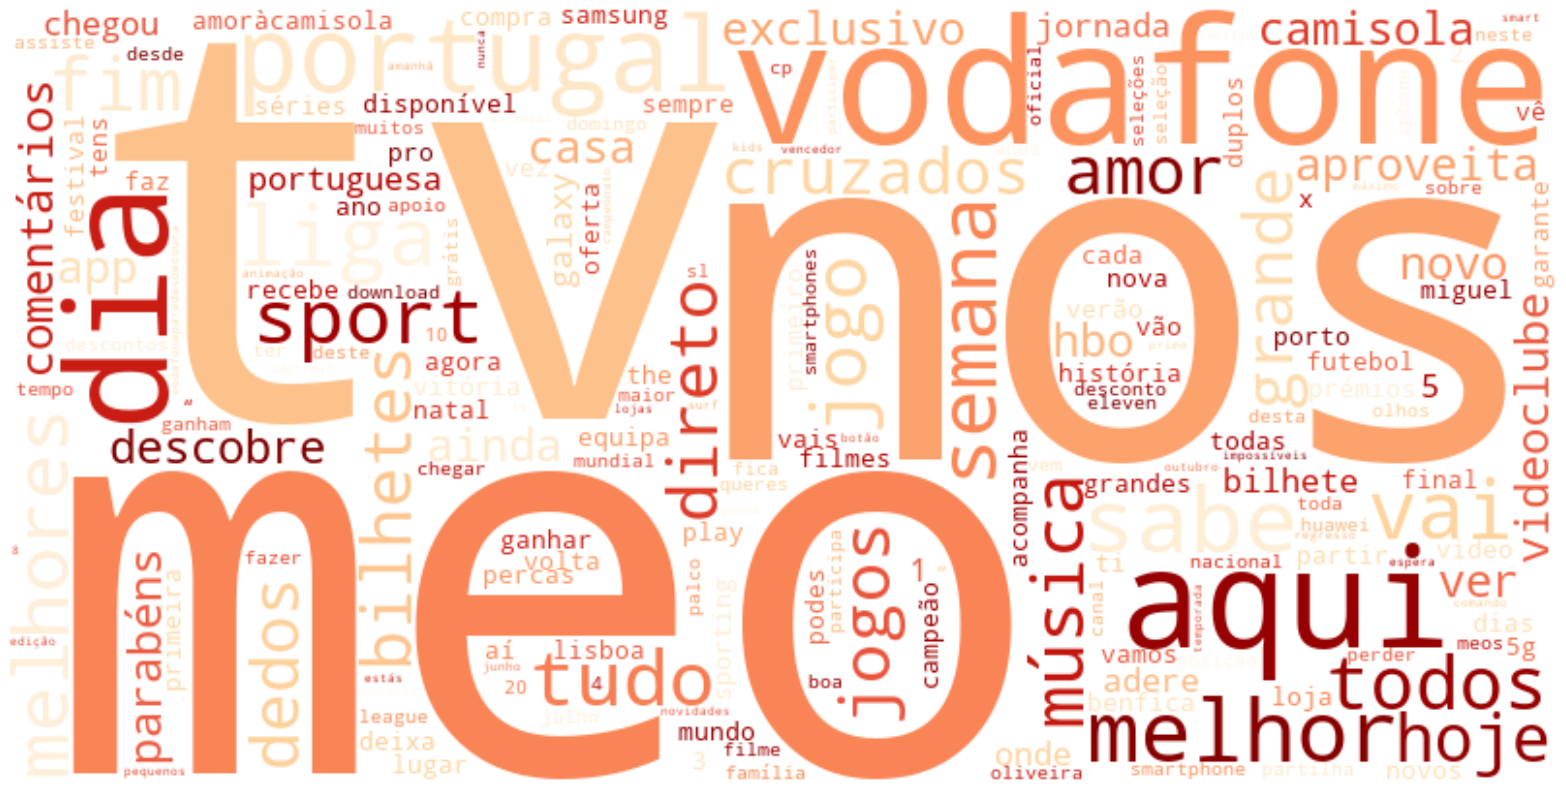

In [68]:
# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='OrRd') \
            .generate_from_frequencies(contagem_palavras_post_text)

# Plotar a nuvem de palavras
plot_cloud(wordcloud)

### 💬 Aplicação à base de dados já limpa para os *comments*

In [69]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenização do texto dos posts
tokens = []
for post in Facebook_Comments['comment_text_clean']:
    tokens.extend(word_tokenize(str(post)))

# Contagem das palavras
contagem_palavras_comment_text = Counter(tokens)

# # Exibir as palavras mais frequentes
# print("\033[1mPalavras mais frequentes:\033[0m")
# for palavra, frequencia in contagem_palavras_comment_text.most_common(50):  # As 50 palavras mais frequentes
#     print(f"{palavra}: {frequencia} vezes")

In [70]:
# import csv

# # Criação do arquivo CSV - Unigrama Comment
# with open('Datasets_Vodafone/TextMining/Unigramas_Comment.csv', 'w', newline='', encoding='utf-8') as arquivo:
#     escritor = csv.writer(arquivo)
#     escritor.writerow(["Token", "Frequência"])

#     # Escrita dos tokens e suas frequências no arquivo CSV
#     for token, frequencia in contagem_palavras_comment_text.items():
#         escritor.writerow([token, frequencia])

In [71]:
print("\033[1mNº de Tokens/Unigramas escritos na variável comment_text:\033[0m",sum(contagem_palavras_comment_text.values()), "\033[1mdos quais\033[0m", 
      len(contagem_palavras_comment_text), "\033[1msão únicos\033[0m")

Nº de Tokens/Unigramas escritos na variável comment_text: 1060792 dos quais 72963 são únicos


---
Entre as operadoras, pode-se observar que a mais mencionada nos comentários é a **NOS**, em oitavo lugar das palavras mais frequentes, seguida pela **MEO**, em décimo sétimo lugar, já a **Vodafone** encontra-se em quadragésiomo nono lugar. 

É de notar que na limpeza prévia não considerou o sentido de cada comentário onde a palavra "nos" era utilizada, daí poder não estar completamente preciso em termos de ser a operadora NOS (e não o "nos" a nível gramatical). 

---

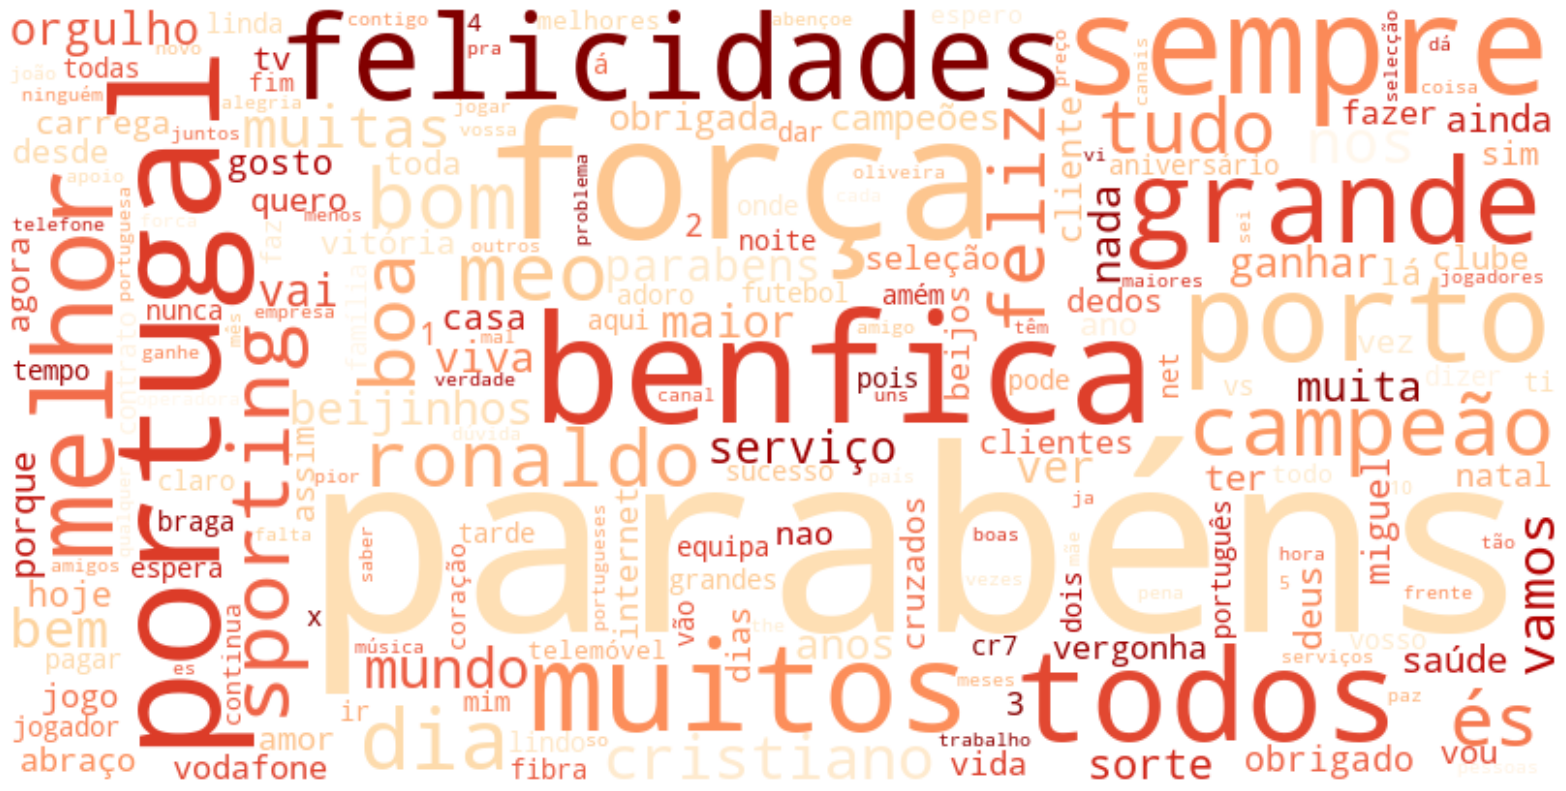

In [72]:
# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='OrRd') \
            .generate_from_frequencies(contagem_palavras_comment_text)

# Plotar a nuvem de palavras
plot_cloud(wordcloud)

## 🔗 Bigramas e Trigramas

In [73]:
# NGram function - Fonte: https://www.kaggle.com/code/bwandowando/generate-bigram-and-trigram-wordcloud
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [74]:
from nltk.tokenize import word_tokenize
from nltk.util import bigrams

# Texto de exemplo
texto = "A Vodafone tentou comprar a NOS e a MEO mas falhou de novo."

# Tokenização do texto
tokens = word_tokenize(texto)

# Criação de bi-grafos
bi_grafos = list(bigrams(tokens))

# Exibição dos bi-grafos
print("\033[1mBi-grafos:\033[0m")
for bi_grafo in bi_grafos:
    print(bi_grafo)

Bi-grafos:
('A', 'Vodafone')
('Vodafone', 'tentou')
('tentou', 'comprar')
('comprar', 'a')
('a', 'NOS')
('NOS', 'e')
('e', 'a')
('a', 'MEO')
('MEO', 'mas')
('mas', 'falhou')
('falhou', 'de')
('de', 'novo')
('novo', '.')


> Consegue-se perceber como os bigramas funcionam

### Aplicação dos `Bigramas` e `Trigramas` à base de dados limpa para os *posts*

In [75]:
# Bigramas 'post_text'
bi_post_text = Facebook_Posts['post_text_clean'].swifter.apply(get_ngrams, n=2)

bi_post_text_string_list = bi_post_text.tolist()
bi_post_text_string = ' '.join(bi_post_text_string_list)

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

In [76]:
# # Criação do arquivo CSV - Bigramas Posts
# with open('Datasets_Vodafone/TextMining/Bigramas_Post.csv', 'w', newline='', encoding='utf-8') as arquivo:
#     escritor = csv.writer(arquivo)
#     escritor.writerow(["Bigrama", "Frequência"])

#     # Contagem dos bigramas
#     contagem_bigramas = Counter(bi_post_text_string.split())

#     # Escrita dos bigramas e suas frequências no arquivo CSV
#     for bigrama, frequencia in contagem_bigramas.items():
#         escritor.writerow([bigrama, frequencia])

In [77]:
# Contar bigramas
bigramas_post_text_str = Counter(bi_post_text_string.split())

print("\033[1mNº de Bigramas escritos na variável post_text:\033[0m",sum(bigramas_post_text_str.values()), 
      "\033[1mdos quais\033[0m", len(bigramas_post_text_str), "\033[1msão únicos\033[0m")

Nº de Bigramas escritos na variável post_text: 62778 dos quais 40728 são únicos


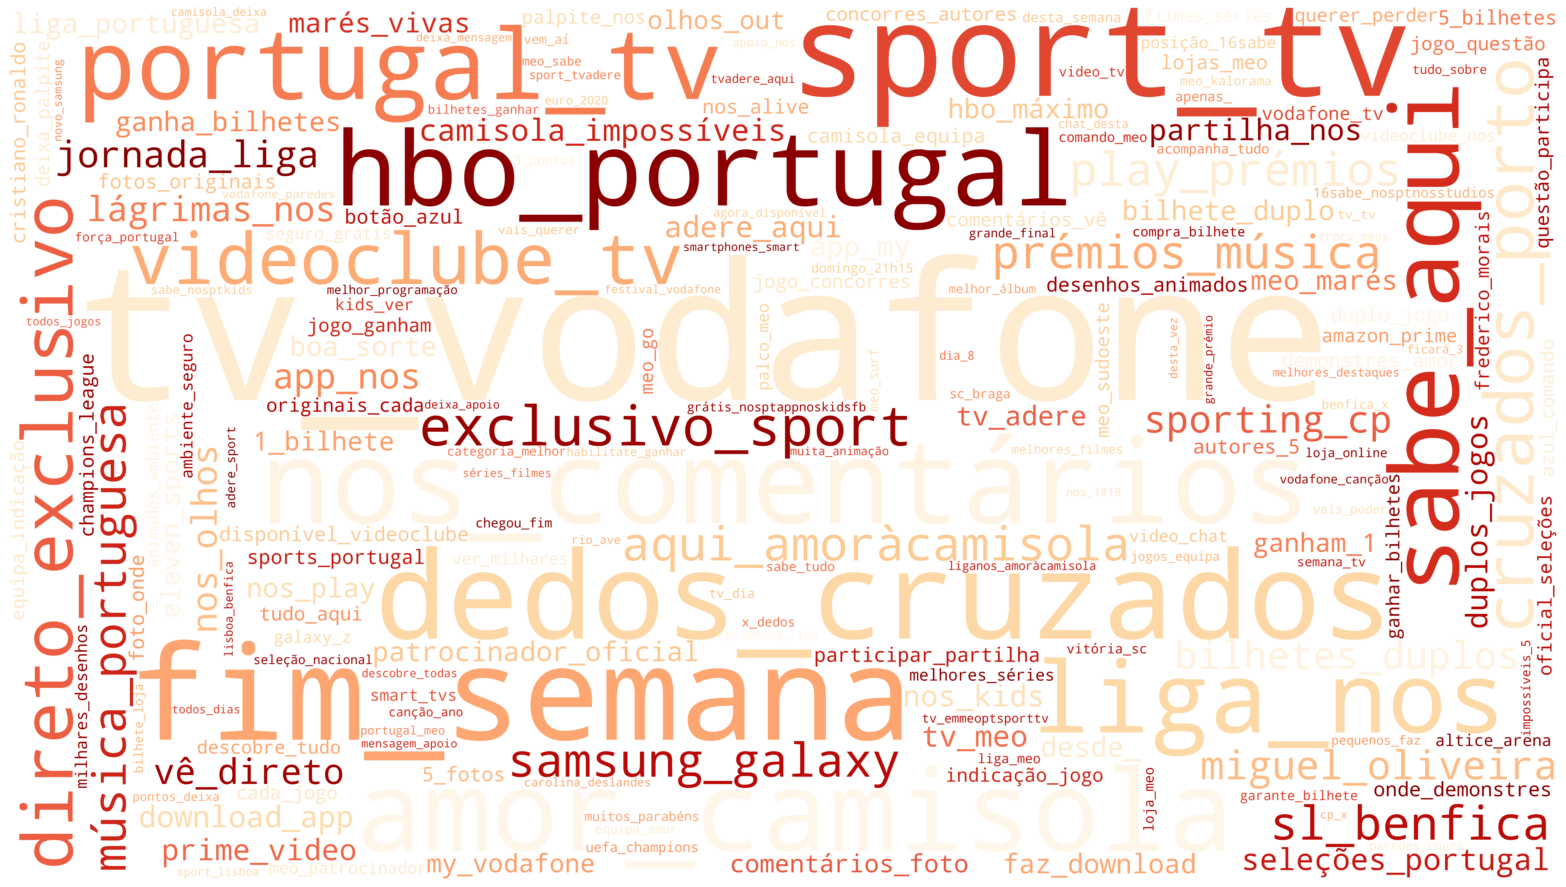

In [78]:
wordcloud = WordCloud(width = 7680, height = 4320, random_state=1, 
                      background_color='white', colormap='OrRd', # max_words = 75, 
                      collocations=False, normalize_plurals=False).generate(bi_post_text_string)

# Plot
plot_cloud(wordcloud)

In [79]:
# Trigramas 'post_text'
tri_post_text = Facebook_Posts['post_text_clean'].swifter.apply(get_ngrams, n=3)
tri_post_text_string_list = tri_post_text.tolist()
tri_post_text_string = ' '.join(tri_post_text_string_list)

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

In [80]:
# # Criação do arquivo CSV - Trigramas Posts
# with open('Datasets_Vodafone/TextMining/Trigramas_Post.csv', 'w', newline='', encoding='utf-8') as arquivo:
#     escritor = csv.writer(arquivo)
#     escritor.writerow(["Trigrama", "Frequência"])

#     # Contagem dos trigramas
#     contagem_trigramas = Counter(tri_post_text_string.split())

#     # Escrita dos trigramas e suas frequências no arquivo CSV
#     for trigrama, frequencia in contagem_trigramas.items():
#         escritor.writerow([trigrama, frequencia])

In [81]:
# Contar trigramas
trigramas_post_text_str = Counter(tri_post_text_string.split())

print("\033[1mNº de Trigramas escritos na variável post_text:\033[0m",sum(trigramas_post_text_str.values()), 
      "\033[1mdos quais\033[0m", len(trigramas_post_text_str), "\033[1msão únicos\033[0m")

Nº de Trigramas escritos na variável post_text: 59285 dos quais 48900 são únicos


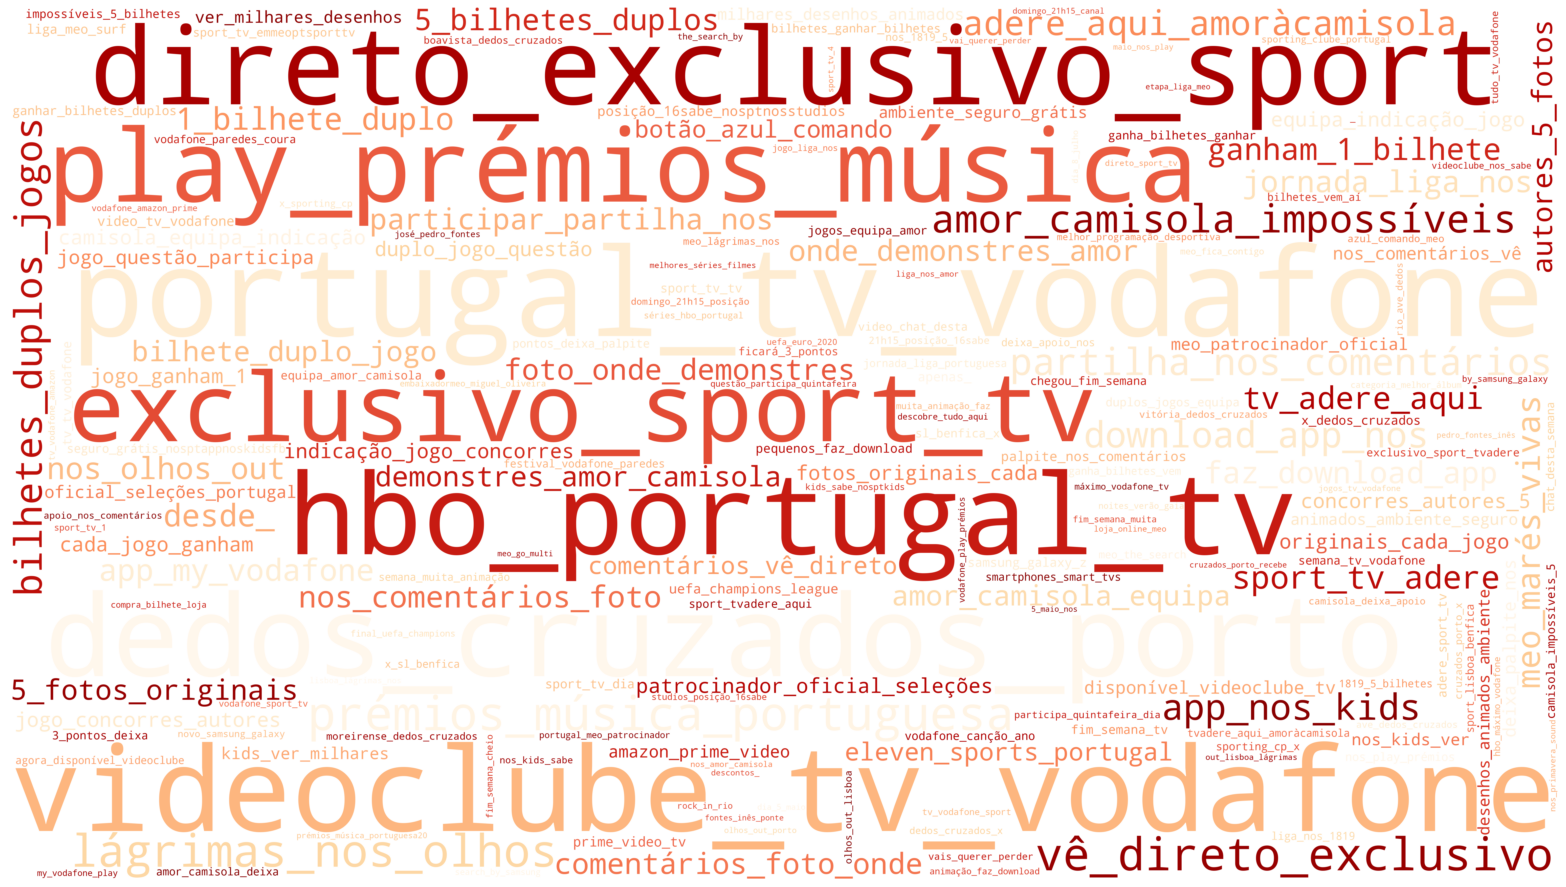

In [82]:
wordcloud = WordCloud(width = 7680, height = 4320, random_state=1, 
                      background_color='white', colormap='OrRd', # max_words = 75, 
                      collocations=False, normalize_plurals=False).generate(tri_post_text_string)

# Plot
plot_cloud(wordcloud)

### Aplicação dos Bigramas e Trigramas para a base de dados dos *comments* limpa

In [83]:
# Bigramas 'comment_text'
bi_comment_text = Facebook_Comments['comment_text_clean'].swifter.apply(get_ngrams, n=2)

bi_comment_text_string_list = bi_comment_text.tolist()
bi_comment_text_string = ' '.join(bi_comment_text_string_list)

# Contar bigramas
bigramas_comment_text_str = Counter(bi_comment_text_string.split())

print("\033[1mNº de Bigramas escritos na variável comment_text:\033[0m",sum(bigramas_comment_text_str.values()), 
      "\033[1mdos quais\033[0m", len(bigramas_comment_text_str), "\033[1msão únicos\033[0m")

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

Nº de Bigramas escritos na variável comment_text: 866218 dos quais 449775 são únicos


In [84]:
# # Criação do arquivo CSV - Bigramas Comment
# with open('Datasets_Vodafone/TextMining/Bigramas_Comment.csv', 'w', newline='', encoding='utf-8') as arquivo:
#     escritor = csv.writer(arquivo)
#     escritor.writerow(["Bigramas", "Frequência"])

#     # Escrita dos bigramas e suas frequências no arquivo CSV
#     for bigrama, frequencia in bigramas_comment_text_str.items():
#         escritor.writerow([bigrama, frequencia])

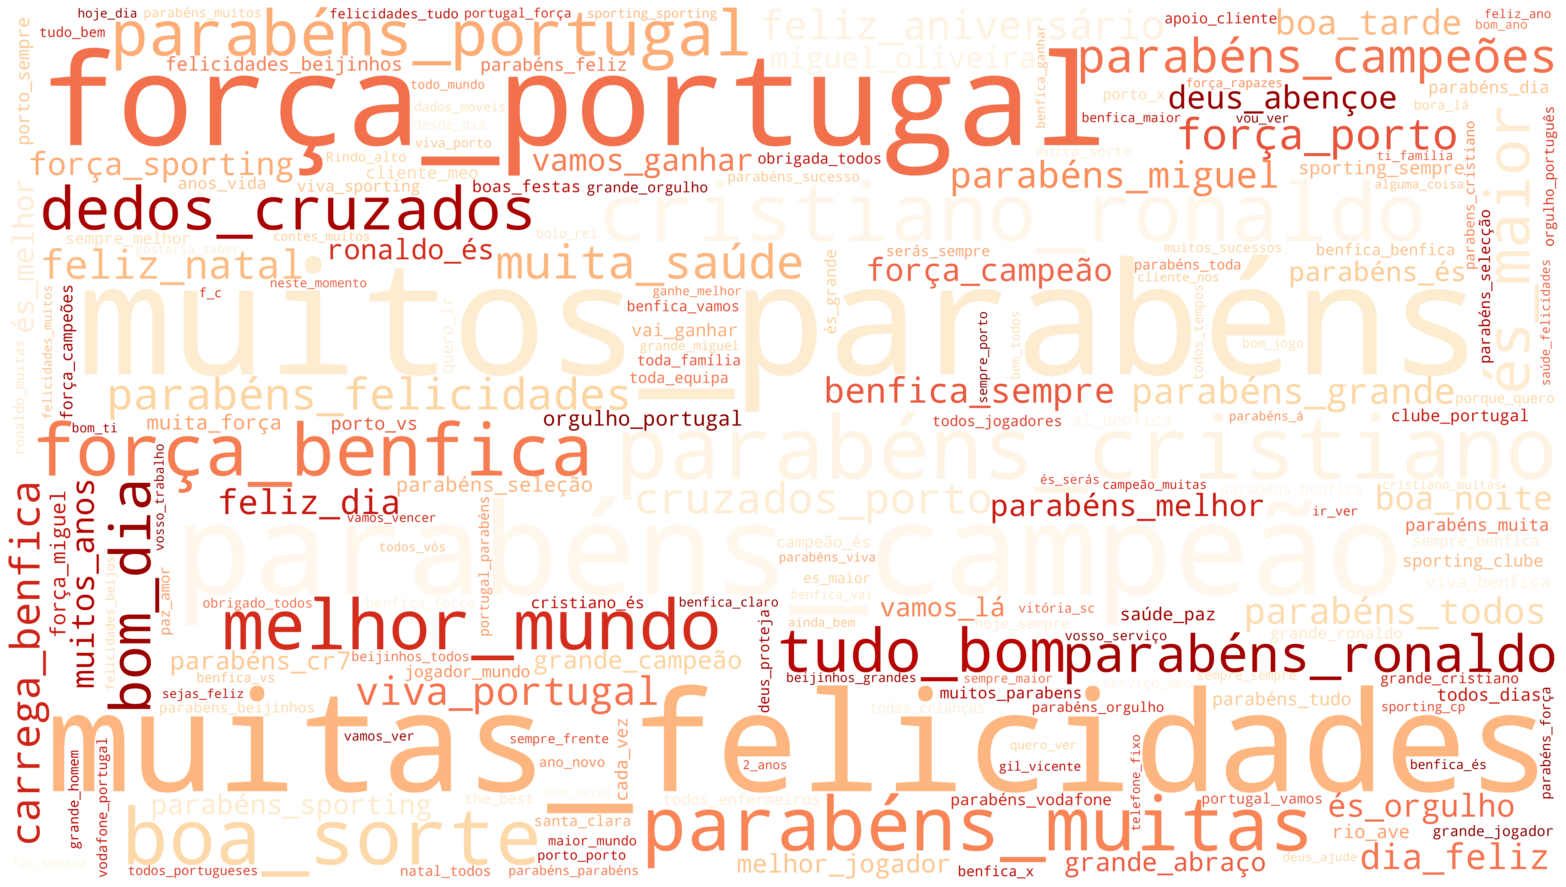

In [85]:
wordcloud = WordCloud(width = 7680, height = 4320, random_state=1, 
                      background_color='white', colormap='OrRd', # max_words = 75, 
                      collocations=False, normalize_plurals=False).generate(bi_comment_text_string)

# Plot
plot_cloud(wordcloud)

In [86]:
# Trigramas 'comment_text'
tri_comment_text = Facebook_Comments['comment_text_clean'].swifter.apply(get_ngrams, n=3)
tri_comment_text_string_list = tri_comment_text.tolist()
tri_comment_text_string = ' '.join(tri_comment_text_string_list)

# Contar trigramas
trigramas_comment_text_str = Counter(tri_comment_text_string.split())

print("\033[1mNº de Bigramas escritos na variável comment_text:\033[0m",sum(trigramas_comment_text_str.values()), 
      "\033[1mdos quais\033[0m", len(trigramas_comment_text_str), "\033[1msão únicos\033[0m")

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

Nº de Bigramas escritos na variável comment_text: 702883 dos quais 572333 são únicos


In [87]:
# # Criação do arquivo CSV - Trigramas Comment
# with open('Datasets_Vodafone/TextMining/Trigramas_Comment.csv', 'w', newline='', encoding='utf-8') as arquivo:
#     escritor = csv.writer(arquivo)
#     escritor.writerow(["Trigramas", "Frequência"])

#     # Escrita dos trigramas e suas frequências no arquivo CSV
#     for trigrama, frequencia in trigramas_comment_text_str.items():
#         escritor.writerow([trigrama, frequencia])

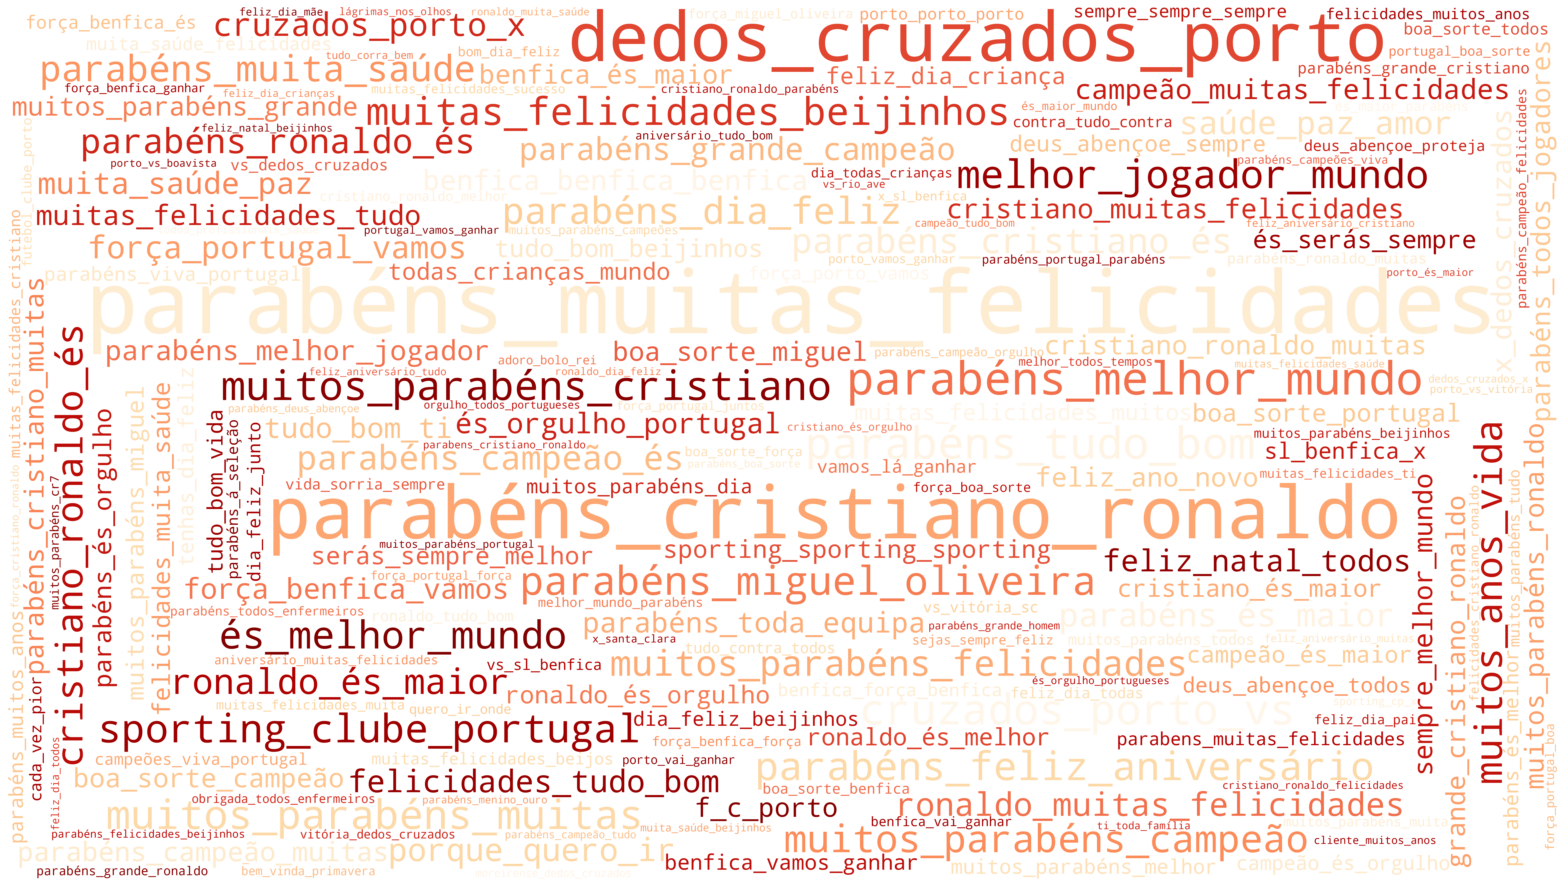

In [88]:
wordcloud = WordCloud(width = 7680, height = 4320, random_state=1, 
                      background_color='white', colormap='OrRd', # max_words = 75, 
                      collocations=False, normalize_plurals=False).generate(tri_comment_text_string)

# Plot
plot_cloud(wordcloud)

---

### Alternativa com o `Likelihood Ratio`

In [135]:
# from nltk.tokenize import word_tokenize
# from nltk.collocations import BigramCollocationFinder
# from nltk.metrics import BigramAssocMeasures

# # Tokenização dos textos dos posts
# tokens = []
# for post in Facebook_Posts['post_text_clean']:
#     tokens.extend(word_tokenize(str(post)))

# # Gerar bigramas ---- Alternativa
# finder = BigramCollocationFinder.from_words(tokens)
# bigramas = finder.nbest(BigramAssocMeasures.likelihood_ratio, 100)  # Escolha dos 100 melhores bigramas

# # Exibir os bigramas
# # print("Bigramas mais frequentes:")
# # for bigrama in bigramas:
# #     print(bigrama)

In [126]:
# bigramas_freq

In [136]:
# # Converter os bigramas em uma única string
# bigramas_str = ' '.join(['_'.join(bigram) for bigram in bigramas])

# # Criar um objeto WordCloud
# wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='OrRd').generate(bigramas_str)

# # Plotar a nuvem de palavras
# plot_cloud(wordcloud)

> Consegue-se ter uma melhor ideia sobre o que é que se refere a palavra "nos"

In [143]:
# from nltk.tokenize import word_tokenize
# from nltk.collocations import BigramCollocationFinder
# from nltk.metrics import BigramAssocMeasures

# # Tokenização dos textos dos comments
# tokens = []
# for post in Facebook_Comments['comment_text_clean']:
#     tokens.extend(word_tokenize(str(post)))

# # Gerar bigramas
# finder = BigramCollocationFinder.from_words(tokens)
# bigramas = finder.nbest(BigramAssocMeasures.likelihood_ratio, 100)  # Escolha dos 50 melhores bigramas

# Exibir os bigramas
# print("Bigramas mais frequentes:")
# for bigrama in bigramas:
#     print(bigrama)

In [142]:
# Converter os bigramas em uma única string
# bigramas_str = ' '.join(['_'.join(bigram) for bigram in bigramas])

# Criar um objeto WordCloud
# wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='OrRd').generate(bigramas_str)

# Plotar a nuvem de palavras
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

---

## 🗃️ Integração de Dados

In [59]:
# Compilar as bases de dados
Facebook_Posts_Comments = pd.merge(Facebook_Posts, Facebook_Comments, how = 'right', 
                                   on = list(Facebook_Comments.columns.intersection(Facebook_Posts.columns)))

# Facebook_Comments.columns.intersection(Facebook_Posts.columns) =
#           ['page', 'post_id', 'post_text', 'post_date', 'post_reactions', 'post_comments', 
#            'post_shares', 'post_day', 'post_month', 'post_year', 'post_hour', 'post_link']

Facebook_PCU = pd.merge(Facebook_Posts_Comments, Facebook_Users, how='left', on=['user_link', 'user_name'])

In [60]:
# Reorganizar as colunas
colunas_organizadas = [
    'page', 'post_id', 'post_link', 'post_date', 'post_day', 'post_month', 'post_year', 'post_hour', 
    'post_reactions', 'post_comments', 'post_shares', 'post_text', 'post_text_clean', 'post_language',
    
    'comment_id', 'comment_link', 'comment_date', 'comment_day_ago', 'comment_reactions', 'comment_num_responses',
    'comment_operator_responded', 'comment_text', 'comment_language', 'comment_text_clean',
    
    'user_name', 'user_link', 'user_current_city', 'user_hometown', 
    'user_freguesia', 'user_concelho', 'user_distrito', 'user_pais', 'user_city_not_portugal', 'user_predicted_genre'
]

Facebook_PCU = Facebook_PCU[colunas_organizadas]

```Python
# Guardar os dados integrados em formato .txt
Facebook_PCU.to_csv('Datasets_Vodafone/Facebook_PCU.txt', sep='\t', index=False, encoding='utf-8')
```

---

# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>4 | Modeling</b></h1></center>
</div>

In [20]:
# conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia [Para PCs com NVIDIA]
# !pip install --upgrade accelerate
# ---------
# !pip install --upgrade transformers
# ---------
# !pip install simpletransformers ---------
# !pip install xformers           ---------

In [21]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [22]:
import transformers
print(transformers.__version__)

4.40.1


In [23]:
# Fonte: https://huggingface.co/models
from transformers import pipeline, AutoModel, AutoTokenizer

In [24]:
import torch
torch.cuda.empty_cache()  # You may use this command to clear your cache
torch.cuda.is_available() # You may use this command to check if you have gpu or not

True

In [25]:
# automatically chose CPU or GPU for inference, depending on your hardware
import torch
print(torch.__version__)
device = torch.cuda.current_device() if torch.cuda.is_available() else -1
# -1 == CPU ; 0 == GPU
print(device)

2.3.0+cu121
0


In [26]:
# Hugging Face
import os
os.environ['HF_HOME'] = 'C:/HuggingFace'               #   -----------> Caso de Erro -> Alterar a paste de '.cache'
os.environ['HF_DATASETS_CACHE'] = 'C:/HuggingFace'
os.environ['TRANSFORMERS_CACHE'] = 'C:/HuggingFace'

In [27]:
# Import da base de dados integrada 
# Facebook_PCU = pd.read_csv('Datasets_Vodafone/Facebook_PCU.txt', sep='\t', encoding='utf-8')

# <a class='anchor' id='4.1'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent; 
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #A30000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #A30000;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>Sentiment Analysis</b></h2></center>
</div>

----

## 🟡 HuggingFace [Meta-Llama-3-8B](https://huggingface.co/meta-llama/Meta-Llama-3-8B)

In [30]:
# from huggingface_hub import login
# login()

In [31]:
# import transformers

# # Carregar o modelo local
# model = transformers.AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-8B")
# tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B")

# pipeline = transformers.pipeline(
#     "text-generation", 
#     model=model, 
#     tokenizer=tokenizer,    
#     model_kwargs={"torch_dtype": torch.bfloat16}, 
#     device_map="auto"
# )

In [33]:
# pipeline("Hey how are you doing today?")

> Requisitos minimos não correspondidos

---

## 🟡 HuggingFace [Mistral-7B-Instruct-v0.2](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2)

In [10]:
# from transformers import AutoModelForCausalLM, AutoTokenizer

# device = "cuda" # the device to load the model onto

# model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
# tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

# messages = [
#     {"role": "user", "content": "What is your favourite condiment?"},
#     {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
#     {"role": "user", "content": "Do you have mayonnaise recipes?"}
# ]

# encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

# model_inputs = encodeds.to(device)
# model.to(device)

# generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
# decoded = tokenizer.batch_decode(generated_ids)
# print(decoded[0])

> Requisitos minimos não correspondidos

---

## 🟡 HuggingFace [distilbert-base-multilingual-cased-sentiments-student](https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student)

In [34]:
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True
)

In [35]:
# Teste em Inglês
distilled_student_sentiment_classifier ("I love this movie and i would watch it again and again!")
# >> [[{'label': 'positive', 'score': 0.9731044769287109},
#   {'label': 'neutral', 'score': 0.016910076141357422},
#   {'label': 'negative', 'score': 0.009985478594899178}]]

[[{'label': 'positive', 'score': 0.9731044769287109},
  {'label': 'neutral', 'score': 0.016910076141357422},
  {'label': 'negative', 'score': 0.009985473938286304}]]

In [36]:
# Teste em Português
distilled_student_sentiment_classifier("O serviço não é de qualidade")

[[{'label': 'positive', 'score': 0.04751550406217575},
  {'label': 'neutral', 'score': 0.5590350031852722},
  {'label': 'negative', 'score': 0.39344942569732666}]]

> Baixa qualidade de classificação -> Não Adaptado para **Português**

---

## 🟡 HuggingFace [bert-base-multilingual-uncased-sentiment](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment)

In [38]:
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [39]:
data = ["A Vodafone é horrível!", "O Rui é tão feio", "O senhor é maluco!", "O mapa está feito!", "Força FCP"]
classifier(data)

[{'label': '1 star', 'score': 0.7041471004486084},
 {'label': '2 stars', 'score': 0.29252415895462036},
 {'label': '1 star', 'score': 0.6657077670097351},
 {'label': '5 stars', 'score': 0.4359695017337799},
 {'label': '5 stars', 'score': 0.31268689036369324}]

In [40]:
comments = Facebook_Comments['comment_text'][0:10].to_list()
output = classifier(comments)
df_result = pd.DataFrame(output)
df_result['comment'] = comments
df_result

label     score  \
0  5 stars  0.634955   
1   1 star  0.355027   
2   1 star  0.263441   
3  4 stars  0.281704   
4   1 star  0.775169   
5  5 stars  0.808028   
6  5 stars  0.538753   
7  5 stars  0.537281   
8  4 stars  0.232646   
9  5 stars  0.359690   

                                                                                                                                                                                       comment  
0                                                                                                                                          Boa noite força sucesso sempre Amém gratidão sempre  
1                                                                                                                                                                                   O roxo ...  
2                                                                                                                                                                                     Vermelho  
3                                                                                                                                                                                           HU  
4  Vodafone Portugal . Então? Nada de perder qualidade.  As gravações estão sempre com problemas. Mãos à obra para retificar. Os outros estão na fila. Cliente insatisfeito muda de operadora.  
5                                                                                                                                          Força campeão és o maior viva sempre portistas viva  
6                                                                                                                                                            Força porto estamos unidos sempre  
7                                                                                                                                                                      Força  fcporto  sempre.  
8                                                                                                                                                                                  Força Porto  
9                                                                                                                                                                              Força  FC Porto

> Não se justifica esta subdivisão para a análise de sentimentos!

---

## 🟡 HuggingFace [twitter-xlm-roberta-base-sentiment-finetunned](https://huggingface.co/citizenlab/twitter-xlm-roberta-base-sentiment-finetunned)

In [35]:
model_path = "citizenlab/twitter-xlm-roberta-base-sentiment-finetunned"
TXRBSF_sentiment_classifier = pipeline("text-classification", model=model_path, tokenizer=model_path, device=device)

# Defina a função de classificação
def TXRBSF_classify_sentiment(text):
    if text.strip() == '' or text is None:
        return np.NaN, np.NaN
    outputs = TXRBSF_sentiment_classifier(text, batch_size=8)
    return outputs[0]['label'], outputs[0]['score']

In [36]:
# Teste do Modelo

# Exemplo
print("\033[1mElementos da Pipeline:\033[0m \n",
      TXRBSF_sentiment_classifier("A Vodafone tem um serviço de baixa qualidade!"))

print("\n\033[1mOutput da Função TXRBSF_classify_sentiment:\033[0m \n",
      TXRBSF_classify_sentiment("A Vodafone tem um serviço de baixa qualidade!"))

Elementos da Pipeline: 
 [{'label': 'Negative', 'score': 0.9786403775215149}]

Output da Função TXRBSF_classify_sentiment: 
 ('Negative', 0.9786403775215149)


```Python
# ------------------------------ Já corri - 30.04.2024 ------------------------------
# Aplicar o twitter-xlm-roberta-base-sentiment-finetunned ao dataset dos posts
TXRBSF_classify_posts_sentiments = Facebook_Posts['post_text'].progress_apply(lambda x: TXRBSF_classify_sentiment(x))
labels, scores = zip(*[(label, score) for label, score in TXRBSF_classify_posts_sentiments])

Facebook_Posts['TXRBSF_post_sentiment_label'] = labels
Facebook_Posts['TXRBSF_post_sentiment_score'] = scores

# Salvar a nova coluna como um arquivo CSV
Facebook_Posts[['post_id','post_text', 'TXRBSF_post_sentiment_label', 'TXRBSF_post_sentiment_score']].to_csv('Datasets_Vodafone/TextMining/TXRBSF_post_sentiment.csv', index=False, encoding='utf-8')
```

In [61]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
TXRBSF_post_sentiment = pd.read_csv('Datasets_Vodafone/TextMining/TXRBSF_post_sentiment.csv') \
                          .drop(['post_id','post_text'], axis=1)
Facebook_Posts = Facebook_Posts.assign(**TXRBSF_post_sentiment)

In [62]:
Facebook_Posts[['post_text', 'TXRBSF_post_sentiment_label', 'TXRBSF_post_sentiment_score']].sample(5)

post_text  \
540                                                                                                                «Chega pra lá» que o Dino D'Santiago acaba de ganhar o segundo prémio da noite com "Kriola", desta vez na categoria Melhor Álbum dos PLAY - Prémios da Música Portuguesa de 2021. Muitos parabéns!   
1055                                                                                                                                                                                        Este fim de semana ganhamos mais uma hora para as novidades da HBO Portugal, na Tv da Vodafone Qual a série a não perder?   
806                                                                                                                                                                                                                        Tudo a postos para um fim de semana de gigantes.  O palco é a SPORT TV, na Tv da Vodafone.   
3391  O CD Aves desloca-se até ao Porto para defrontar o FC Porto, que continua na corrida ao título da Liga NOS. Quem ficará com os 3 pontos? Deixa o teu palpite nos comentários. Vê em direto e em exclusivo na Sport TV. Adere aqui: http://nos.pt/adesao-sporttv#LigaNOS #AmoràCamisola #FCPCDA #FCPorto #CDAves   
3120                                                                                                                                         Chegou mais um fim de semana com muita animação. Faz download da app NOS Kids para ver milhares de desenhos animados num ambiente seguro e grátis: nos.pt/app-noskids-fb   

     TXRBSF_post_sentiment_label  TXRBSF_post_sentiment_score  
540                     Positive                     0.965984  
1055                     Neutral                     0.879041  
806                      Neutral                     0.984819  
3391                     Neutral                     0.990830  
3120                     Neutral                     0.979639

In [164]:
# Tabela de Frequências de sentimentos
print("\033[1mNº de NAs:\033[0m", Facebook_Posts['TXRBSF_post_sentiment_label'].isna().sum())
pd.DataFrame({
    'n':Facebook_Posts['TXRBSF_post_sentiment_label'].value_counts(),
    '%':round(Facebook_Posts['TXRBSF_post_sentiment_label'].value_counts(normalize=True) * 100,1)})

Nº de NAs: 59


n     %
TXRBSF_post_sentiment_label            
Neutral                      3080  88.2
Positive                      365  10.4
Negative                       49   1.4

> O nº de **`NAs`** bate certo com os *posts* sem texto!

---

```Python
# ------------------------------ Já corri - 01.05.2024 ------------------------------
# Aplicar o twitter-xlm-roberta-base-sentiment-finetunned ao dataset dos comentários
TXRBSF_classify_comments_sentiments = Facebook_Comments['comment_text'].progress_apply(lambda x: TXRBSF_classify_sentiment(x))
labels, scores = zip(*[(label, score) for label, score in TXRBSF_classify_comments_sentiments])

Facebook_Comments['TXRBSF_comment_sentiment_label'] = labels
Facebook_Comments['TXRBSF_comment_sentiment_score'] = scores

# Salvar a nova coluna como um arquivo CSV
Facebook_Comments[['comment_id', 'comment_text', 'TXRBSF_comment_sentiment_label', 'TXRBSF_comment_sentiment_score']] \
    .to_csv('Datasets_Vodafone/TextMining/TXRBSF_comment_sentiment.csv', index=False, encoding='utf-8')
```

In [64]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
TXRBSF_comment_sentiment = pd.read_csv('Datasets_Vodafone/TextMining/TXRBSF_comment_sentiment.csv') \
                             .drop(['comment_id','comment_text'], axis=1)
Facebook_Comments = Facebook_Comments.assign(**TXRBSF_comment_sentiment)

In [65]:
# Verificar as 4 observações sem 'TXRBSF_comment_sentiment_label' e 'TXRBSF_comment_sentiment_score' -> Não têm texto
# Facebook_Comments[Facebook_Comments[['TXRBSF_comment_sentiment_label', 'TXRBSF_comment_sentiment_score']].isna().any(axis=1)]

In [66]:
Facebook_Comments[['comment_text', 'TXRBSF_comment_sentiment_label', 'TXRBSF_comment_sentiment_score']].sample(5)

comment_text  \
109057                                         Parabéns amigo pelo excelente trabalho realizado um abraço   
154571  Parabéns à apaf pelo primeiro campeonato dado a uma equipe que lutou contra os árbitros viva apaf   
30112                                                                              Tenho um cão é o spyke   
188743                                                                           O Porto ganha de certeza   
90868                                Parabens  Cristiano Ronaldo és o melhor do mundo .MuitasFelicidades.   

       TXRBSF_comment_sentiment_label  TXRBSF_comment_sentiment_score  
109057                       Positive                        0.989679  
154571                       Positive                        0.905297  
30112                         Neutral                        0.989645  
188743                        Neutral                        0.661489  
90868                        Positive                        0.987933

In [170]:
TXRBSF_comment_sentiment_label_df = pd.DataFrame({
    'n':Facebook_Comments['TXRBSF_comment_sentiment_label'].value_counts(),
    '%':round(Facebook_Comments['TXRBSF_comment_sentiment_label'].value_counts(normalize=True) * 100,1)})

TXRBSF_comment_sentiment_label_df.index.name = 'TXRBSF Model'
TXRBSF_comment_sentiment_label_df

n     %
TXRBSF Model              
Positive      102516  52.8
Neutral        76010  39.1
Negative       15724   8.1

---

## 🟡 HuggingFace [mDeBERTa-v3-base-xnli-multilingual-nli-2mil7](https://huggingface.co/MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7)

In [43]:
# Defina o pipeline de classificação
model_path = "MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7"
moritz_classifier = pipeline("zero-shot-classification", model=model_path, tokenizer=model_path, device=device)

# Nota: para utlizar este modelo temos de dar moritz_classifier(sequence_to_classify, candidate_labels, multi_label=False)

# Defina as classes a classificar pelo modelo
candidate_labels = ['Positive', 'Neutral', 'Negative']

# Defina a função de classificação
def mDeBERTa_classify_sentiment(texts):
    outputs = moritz_classifier([texts], candidate_labels, multi_label=False, batch_size=8)
    labels = [output['labels'][0] for output in outputs]
    scores = [output['scores'][0] for output in outputs]
    return labels, scores

In [44]:
# Exemplo
print("\033[1mElementos da Pipeline:\033[0m \n",
      moritz_classifier("A Vodafone tem um serviço de baixa qualidade!", candidate_labels, multi_label=False))

print("\n\033[1mOutput da Função mDeBERTa_classify_sentiment:\033[0m \n",
      mDeBERTa_classify_sentiment("A Vodafone tem um serviço de baixa qualidade!"))

Elementos da Pipeline: 
 {'sequence': 'A Vodafone tem um serviço de baixa qualidade!', 'labels': ['Negative', 'Neutral', 'Positive'], 'scores': [0.9463707208633423, 0.03052888810634613, 0.023100359365344048]}

Output da Função mDeBERTa_classify_sentiment: 
 (['Negative'], [0.9463709592819214])


```Python
# ------------------------------ Já corri - 30.04.2024 ------------------------------
# Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos posts
mDeBERTa_posts_sentiments = Facebook_Posts['post_text'].progress_apply(lambda x: mDeBERTa_classify_sentiment([x]))
labels, scores = zip(*[(label, score) for label, score in mDeBERTa_posts_sentiments])

Facebook_Posts['mDeBERTa_post_sentiment_label'] = labels
Facebook_Posts['mDeBERTa_post_sentiment_score'] = scores

# Salvar a nova coluna como um arquivo CSV
Facebook_Posts[['post_id', 'post_text', 'mDeBERTa_post_sentiment_label', 'mDeBERTa_post_sentiment_score']] \
    .to_csv('Datasets_Vodafone/TextMining/mDeBERTa_post_sentiment.csv', encoding='utf-8', index=False)
```

In [68]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
mDeBERTa_post_sentiment = pd.read_csv('Datasets_Vodafone/TextMining/mDeBERTa_post_sentiment.csv', encoding='utf-8')  \
                          .drop(['post_id','post_text'], axis=1)
Facebook_Posts = Facebook_Posts.assign(**mDeBERTa_post_sentiment)

# Limpar a variável 'mDeBERTa_post_sentiment_label'
Facebook_Posts['mDeBERTa_post_sentiment_label'] = Facebook_Posts['mDeBERTa_post_sentiment_label'].str.strip("['']")

# Converter a variável 'mDeBERTa_post_sentiment_score' para float
Facebook_Posts['mDeBERTa_post_sentiment_score'] = Facebook_Posts['mDeBERTa_post_sentiment_score'].str.strip("['']").astype(float)

In [173]:
mDeBERTa_post_sentiment_label_df = pd.DataFrame({
    'n':Facebook_Posts['mDeBERTa_post_sentiment_label'].value_counts(),
    '%':round(Facebook_Posts['mDeBERTa_post_sentiment_label'].value_counts(normalize=True) * 100,1)
})

mDeBERTa_post_sentiment_label_df.index.name = 'mDeBERTa Model'
mDeBERTa_post_sentiment_label_df

n     %
mDeBERTa Model            
Positive        3117  87.7
Negative         280   7.9
Neutral          156   4.4

In [70]:
Facebook_Posts[['post_text', 'mDeBERTa_post_sentiment_label', 'mDeBERTa_post_sentiment_score']].sample(5)

post_text  \
3154                                                                                  Chegou mais um fim de semana com muita animação. Faz download da app NOS Kids para ver milhares de desenhos animados num ambiente seguro e grátis: nos.pt/app-noskids-fb   
909                                                                                                                                      A emoção do regresso do campeonato nacional continua na Tv da Vodafone.Quem está num melhor caminho para levantar a ?   
1549  O smartphone que é de outro mundo, traz consigo uma promoção de outra galáxia!  Não percas a oferta de uns Galaxy Buds2 Pro, na compra do smartphone topo de gama Samsung Galaxy S23!  Válido até 4 de junho. Aproveita já https://em.meo.pt/samsung_s23   
2767                                                                             A guerra pelo trono acaba aqui.  Dia 15 de abril estreia a última temporada de A GUERRA dos TRONOS, no SYFY no MEO, em simultâneo com os EUA.Sabe mais: https://em.meo.pt/GoT   
543                                                                                                                        Os Clã hoje fazem a festa com a vitória na categoria Melhor Grupo dos PLAY - Prémios da Música Portuguesa de 2021. Muitos parabéns!   

     mDeBERTa_post_sentiment_label  mDeBERTa_post_sentiment_score  
3154                      Positive                       0.661368  
909                       Positive                       0.474590  
1549                      Positive                       0.686991  
2767                      Positive                       0.473326  
543                       Positive                       0.914762

---

```Python
# ------------------------------ Já corri - 01.05.2024 ------------------------------
# Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos comentários
mDeBERTa_comments_sentiments = Facebook_Comments['comment_text'].progress_apply(lambda x: mDeBERTa_classify_sentiment([x]))
labels, scores = zip(*[(label, score) for label, score in mDeBERTa_comments_sentiments])

Facebook_Comments['mDeBERTa_comment_sentiment_label'] = labels
Facebook_Comments['mDeBERTa_comment_sentiment_score'] = scores

# Salvar a nova coluna como um arquivo CSV
Facebook_Comments[['comment_id', 'comment_text', 'mDeBERTa_comment_sentiment_label', 'mDeBERTa_comment_sentiment_score']] \
    .to_csv('Datasets_Vodafone/TextMining/mDeBERTa_comment_sentiment.csv', encoding='utf-8', index=False)
```

In [71]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
mDeBERTa_comment_sentiment = pd.read_csv('Datasets_Vodafone/TextMining/mDeBERTa_comment_sentiment.csv', encoding='utf-8') \
                             .drop(['comment_id','comment_text'], axis=1)
Facebook_Comments = Facebook_Comments.assign(**mDeBERTa_comment_sentiment)

# Limpar a variável 'mDeBERTa_comment_sentiment_label'
Facebook_Comments['mDeBERTa_comment_sentiment_label'] = Facebook_Comments['mDeBERTa_comment_sentiment_label'].str.strip("['']")

# Converter a variável 'mDeBERTa_comment_sentiment_score' para float
Facebook_Comments['mDeBERTa_comment_sentiment_score'] = Facebook_Comments['mDeBERTa_comment_sentiment_score'].str.strip("['']").astype(float)

In [172]:
mDeBERTa_comment_sentiment_label_df = pd.DataFrame({
    'n':Facebook_Comments['mDeBERTa_comment_sentiment_label'].value_counts(),
    '%':round(Facebook_Comments['mDeBERTa_comment_sentiment_label'].value_counts(normalize=True) * 100,1)})

mDeBERTa_comment_sentiment_label_df.index.name = 'mDeBERTa Model'
mDeBERTa_comment_sentiment_label_df

n     %
mDeBERTa Model              
Positive        150778  77.6
Negative         37882  19.5
Neutral           5594   2.9

In [73]:
Facebook_Comments[['comment_text', 'mDeBERTa_comment_sentiment_label', 'mDeBERTa_comment_sentiment_score']].sample(5)

comment_text  \
67406                                                                                                                                                                                                                                   PARABÉNS E QUE CONTES MUITOS MAIS.   
74135                                                                                                                                                                                                 Se não for os velhinhos... mais palavras para quê!!! Força Portugal.   
56041                                                                                                                                                                                                                                                      Belas promoções   
114222                                                                                                                                                                                                                                                            Parabéns   
108470  Quem luta e acredita naquilo que faz merece tudo ele é um deles, tudo de bom para um verdadeiro lutador,para se chegar ao topo em qualquer actividade tem que se ter uma uma capacidade de sofrimento e luta diferentes, grande campeão,o maior de todos os tempos   

       mDeBERTa_comment_sentiment_label  mDeBERTa_comment_sentiment_score  
67406                          Positive                          0.948940  
74135                          Negative                          0.460770  
56041                          Positive                          0.954324  
114222                         Positive                          0.976334  
108470                         Positive                          0.887143

---

## ➕ Juntar Modelos dos Sentimentos

#### `Posts`

In [74]:
from sklearn.metrics import confusion_matrix

# Remova as linhas com valores NaN de ambas as colunas
Facebook_Posts_clean = Facebook_Posts.dropna(subset=['TXRBSF_post_sentiment_label', 'mDeBERTa_post_sentiment_label'])

# Crie a matriz de classificação
conf_matrix = confusion_matrix(Facebook_Posts_clean['TXRBSF_post_sentiment_label'], 
                               Facebook_Posts_clean['mDeBERTa_post_sentiment_label'], 
                               labels=["Positive", "Neutral", "Negative"])

# Crie um DataFrame a partir da matriz de classificação
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=["Positive", "Neutral", "Negative"],
                              columns=["Positive", "Neutral", "Negative"])
conf_matrix_df.index.name = "Modelo TXRBSF"
conf_matrix_df.columns.name = 'Modelo mDeBERTa'

display_side_by_side(conf_matrix_df,
                     super_title="Matriz de Classificação dos Resultados de Ambos os Modelos<br></br>",
                     titles=[""])

Matriz de Classificação dos Resultados de Ambos os Modelos 
 
 
 Modelo mDeBERTa 
 Positive 
 Neutral 
 Negative 
 
 
 Modelo TXRBSF 
 
 
 
 
 
 
 
 Positive 
 360 
 2 
 3 
 
 
 Neutral 
 2673 
 151 
 256 
 
 
 Negative 
 25 
 3 
 21

In [75]:
# Variável dos Sentimentos com os 2 Modelos
# Defina as condições para cada caso
conditions = [
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Positive') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Positive'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Positive') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Neutral'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Positive') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Negative'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Neutral') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Positive'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Neutral') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Neutral'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Neutral') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Negative'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Negative') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Positive'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Negative') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Neutral'),
    (Facebook_Posts['TXRBSF_post_sentiment_label'] == 'Negative') & (Facebook_Posts['mDeBERTa_post_sentiment_label'] == 'Negative')
]

# Defina os valores para cada caso
values = ['Positivo', 'Tendência Positiva', 'Neutro', 'Tendência Positiva', 'Neutro', 'Tendência Negativa', 'Neutro', 'Tendência Negativa', 'Negativo']

# Aplique as condições e os valores à nova coluna
Facebook_Posts['post_sentiment_label'] = np.select(conditions, values)

# Atribua o valor NaN à variável 'post_sentiment_label' nas linhas em que uma das colunas é NaN
Facebook_Posts['post_sentiment_label'] = np.where((Facebook_Posts['TXRBSF_post_sentiment_label'].isna()) | 
                                                           (Facebook_Posts['mDeBERTa_post_sentiment_label'].isna()), 
                                                           np.nan, 
                                                           Facebook_Posts['post_sentiment_label'])

In [76]:
pd.DataFrame(Facebook_Posts['post_sentiment_label'].value_counts())

count
post_sentiment_label       
Tendência Positiva     2675
Positivo                360
Tendência Negativa      259
Neutro                  179
Negativo                 21

---

#### `Comments` 

In [77]:
from sklearn.metrics import confusion_matrix

# Remova as linhas com valores NaN de ambas as colunas
Facebook_Comments_clean = Facebook_Comments.dropna(subset=['TXRBSF_comment_sentiment_label', 'mDeBERTa_comment_sentiment_label'])

# Crie a matriz de classificação
conf_matrix = confusion_matrix(Facebook_Comments_clean['TXRBSF_comment_sentiment_label'],
                               Facebook_Comments_clean['mDeBERTa_comment_sentiment_label'],
                               labels=["Positive", "Neutral", "Negative"])

# Crie um DataFrame a partir da matriz de classificação
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=["Positive", "Neutral", "Negative"],
                              columns=["Positive", "Neutral", "Negative"])
conf_matrix_df.index.name = "Modelo TXRBSF"
conf_matrix_df.columns.name = 'Modelo mDeBERTa'

display_side_by_side(conf_matrix_df,
                     super_title="Matriz de Classificação dos Resultados de Ambos os Modelos<br></br>",
                     titles=[""])

Matriz de Classificação dos Resultados de Ambos os Modelos 
 
 
 Modelo mDeBERTa 
 Positive 
 Neutral 
 Negative 
 
 
 Modelo TXRBSF 
 
 
 
 
 
 
 
 Positive 
 99629 
 833 
 2054 
 
 
 Neutral 
 49219 
 4419 
 22372 
 
 
 Negative 
 1926 
 342 
 13456

In [78]:
# Variável dos Sentimentos com os 2 Modelos
# Defina as condições para cada caso
conditions = [
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Positive') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Positive'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Positive') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Neutral'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Positive') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Negative'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Neutral') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Positive'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Neutral') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Neutral'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Neutral') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Negative'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Negative') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Positive'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Negative') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Neutral'),
    (Facebook_Comments['TXRBSF_comment_sentiment_label'] == 'Negative') & (Facebook_Comments['mDeBERTa_comment_sentiment_label'] == 'Negative')
]

# Defina os valores para cada caso
values = ['Positivo', 'Tendência Positiva', 'Neutro', 'Tendência Positiva', 'Neutro', 'Tendência Negativa', 'Neutro', 'Tendência Negativa', 'Negativo']

# Aplique as condições e os valores à nova coluna
Facebook_Comments['comment_sentiment_label'] = np.select(conditions, values)

# Atribua o valor NaN à variável 'comment_sentiment_label' nas linhas em que uma das colunas é NaN
Facebook_Comments['comment_sentiment_label'] = np.where((Facebook_Comments['TXRBSF_comment_sentiment_label'].isna()) |
                                                                (Facebook_Comments['mDeBERTa_comment_sentiment_label'].isna()),
                                                                np.nan,
                                                                Facebook_Comments['comment_sentiment_label'])

In [174]:
comment_sentiment_label_df = pd.DataFrame({
    'n':Facebook_Comments['comment_sentiment_label'].value_counts(),
    '%':round(Facebook_Comments['comment_sentiment_label'].value_counts(normalize=True) * 100,1)
})

comment_sentiment_label_df.index.name = None
comment_sentiment_label_df.reindex(['Positivo', 'Tendência Positiva', 'Neutro', 'Tendência Negativa', 'Negativo'])

n     %
Positivo            99629  51.3
Tendência Positiva  50052  25.8
Neutro               8399   4.3
Tendência Negativa  22714  11.7
Negativo            13456   6.9

---

### 🔴 Extra | Variável `post_text_Vodafone/MEO/NOS` e `comment_text_Vodafone/MEO/NOS`

In [80]:
import re

def create_binary_variable(text, names):
    """
    Cria uma variável binária que é 1 se algum dos nomes na lista aparecer no texto,
    e 0 caso contrário.
    """
    # Verifica se os names é do tipo lista ou string
    # Caso seja string, converte numa lista 
    if isinstance(names, str):
        names = [names]
    
    # Para todos os nomes possíveis, verifica a sua existência
    for name in names:
        # Use a função `re.IGNORECASE` para tornar a pesquisa insensível a maiúsculas e minúsculas
        if re.search(r'\b' + re.escape(name) + r'\b', text, re.IGNORECASE):
            return 1
    return 0

In [81]:
# Teste da Função
textos = ["A VoDafone tem bons serviços!", "Vou mudar para a meo e para a nos", "Nós vamos à praia e comando é meu, vodafoneparedesdecoura"]

# Lista de nomes das operadoras
operators = ['Vodafone', 'MEO', 'NOS', 'DIGI']

for texto in textos:
    print("\033[1mTexto:\033[0m", texto)
    for operator in operators:
        print(f"\033[1m    {operator}:\033[0m", create_binary_variable(texto, operator))
    print("\n")

Texto: A VoDafone tem bons serviços!
    Vodafone: 1
    MEO: 0
    NOS: 0
    DIGI: 0


Texto: Vou mudar para a meo e para a nos
    Vodafone: 0
    MEO: 1
    NOS: 1
    DIGI: 0


Texto: Nós vamos à praia e comando é meu, vodafoneparedesdecoura
    Vodafone: 0
    MEO: 0
    NOS: 0
    DIGI: 0




In [82]:
# Lista de Possibilidades de formas como as operadoras podem ser referidas
vodafone_expressoes = ['Vodafone', 'vodafoneparedesdecoura', 'vodafonehboportugal', 'vodafonept', 
                       'supertaçavodafone', 'myvodafonept', 'vodafoneptparticipe', '30anosvodafone', 
                       'vodafonehappy', 'vodafonebusinessconference', 'vodafonerallydeportugal', 'vodafoneem', 
                       'vodafonetv', 'vodafonetvplay', 'minimaratonavodafone', 'vodafonecançãodoano']

meo_expressoes = ['MEO', 'emmeopttvficaemcasa', 'modomeosdoeste', 'meocomo', 'nomeoptligameosurf2022', 'emmeoptmbeachcam', 
                  'meoficaemcasa', 'meosou', 'meosudoeste', 'meomaresvivas', 'emmeoptinstagram', 'meops', 
                  'emmeoptvemcomtudoomeovemcomtudo', 'meosó', 'meouma', 'emmeoptdesporto', 'meofui', 'meobox', 
                  'emmeoptdicaenergia', 'emmeoptprogramameos', 'meoa', 'ligameosurfjorge', 'emmeopt2021bymeo', 
                  'meono', 'meoou', 'meo', 'meoequipamentos', 'meogonão', 'meovisslaproericeira', 'emmeoptmmv24', 
                  'meovergonha', 'meowifi', 'meosmartphones', 'meopor', 'meoentretenimento', 'meohteam', 'meo4o', 
                  'meoestamos', 'meogo', 'meokalorama', 'emmeoptbandeiraverde', 'meose', 'ligameosurf', 'meoos', 'meojá',
                  'festivalmeo', 'emmeoptsonytv4k', 'meonem', 'portugalmeo', 'meoenergia', 'embaixadorameo', 'meoobrigado',
                  'meonao', 'meopodiam', 'ameo', 'meoque', 'meosabe', 'meoproportugal', 'meoserá', 'emmeoptappstv', 
                  'emmeopttv', 'emmeoptsporttvfb', 'emmeoptsporttv', 'modomeosudoeste', 'meodesde', 'meopela', 
                  'emmeoptpacotesgaming', 'emmeopteuro', 'omeovemcomtudo', 'meohá', 'meoo', 'meopara', 'mymeo', 
                  'suportelojaonlinemeopt', 'meo5sentidos', 'tdtmelhorquemeo', 'nomeoptmaisnet', 'meoassim', 'alticemeo', 
                  'meoaltice', 'meo…', 'meocontactei', 'meonão', 'meoé', 'meofiz', 'emmeoptregressoaulas21', 'meohifi', 
                  'emmeopteleven', 'meoe', 'emmeoptblnight', 'emmeoptbluefriday', 'meo5g', 'meocloud', 'emmeoptmeoskyshowtime', 
                  'meomas', 'embaixadormeo', 'emmeopttvcine', 'meos', 'wearemeokalorama', 'emmeoptmvod', 'meopois', 'meopt', 
                  'tdtémelhorqueameo', 'meofeliz', 'campeõesmeo', 'meossão', 'meoparece', 'meoem', 'emmeoptmeovideochat', 
                  'meosem', 'meoripcurlpro', 'emmeoptpassatempos', 'emmeoptbtv', 'meodepois', 'meoinstagram', 'emmeoptmuda21']

nos_expressoes = ['NOS', 'nosvê', 'nos5g', 'palconos', 'nosplay', 'noscompra', 'nospt', 'nosadere', 'nosptnosstudios', 
                  'nosportugal', 'nosptkids', 'nosptadesaosporttvliganos', 'nossabe', 'nosmúsica', 'nos4a2', 
                  'bancadanos', 'nosno', 'liganos', 'nosalive', 'nosptnoskidsapp', 'nãoteprendaspornos', '5gnos', 
                  'instagramcomliganos', 'nosprimaverasound', 'nosptappnoskidsfb', 'nosptnosplay', 'nosnosalive']

digi_expressoes =['DIGI']

In [83]:
# Aplicar a função create_binary_variable aos conjuntos de dados Facebook_Posts e Facebook_Comments
Facebook_Posts['post_text_Vodafone'] = Facebook_Posts['post_text'].progress_apply(lambda x: create_binary_variable(x, vodafone_expressoes))
Facebook_Posts['post_text_MEO'] = Facebook_Posts['post_text'].progress_apply(lambda x: create_binary_variable(x, meo_expressoes))
Facebook_Posts['post_text_NOS'] = Facebook_Posts['post_text'].progress_apply(lambda x: create_binary_variable(x, nos_expressoes))
Facebook_Posts['post_text_DIGI'] = Facebook_Posts['post_text'].progress_apply(lambda x: create_binary_variable(x, digi_expressoes))

Facebook_Comments['comment_text_Vodafone'] = Facebook_Comments['comment_text'].progress_apply(lambda x: create_binary_variable(x, vodafone_expressoes))
Facebook_Comments['comment_text_MEO'] = Facebook_Comments['comment_text'].progress_apply(lambda x: create_binary_variable(x, meo_expressoes))
Facebook_Comments['comment_text_NOS'] = Facebook_Comments['comment_text'].progress_apply(lambda x: create_binary_variable(x, nos_expressoes))
Facebook_Comments['comment_text_DIGI'] = Facebook_Comments['comment_text'].progress_apply(lambda x: create_binary_variable(x, digi_expressoes))

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3553 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/194254 [00:00<?, ?it/s]

In [84]:
# Função para calcular a %
def calculate_percentage(value, total):
    return round((value / total) * 100,1) if total != 0 else 0

# Tabela de Frequências das váriaveis relativas à referência do nome das operadoras
df_post_text_operatores = pd.DataFrame({
    '0 | Não (n)': Facebook_Posts[['post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI']].apply(lambda x: x.value_counts()[0]),
    '0 | Não (%)': Facebook_Posts[['post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI']].apply(lambda x: calculate_percentage(x.value_counts()[0], len(x))),
    '1 | Sim (n)': Facebook_Posts[['post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI']].apply(lambda x: x.value_counts()[1]),
    '1 | Sim (%)': Facebook_Posts[['post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI']].apply(lambda x: calculate_percentage(x.value_counts()[1], len(x)))
})

df_post_text_operatores.index = [operators]
df_post_text_operatores

0 | Não (n)  0 | Não (%)  1 | Sim (n)  1 | Sim (%)
Vodafone         2655         74.7          898         25.3
MEO              2226         62.7         1327         37.3
NOS              2698         75.9          855         24.1
DIGI             3541         99.7           12          0.3

In [85]:
# Tabela de Frequências das variáveis relativas à referência do nome das operadoras nos comentários do Facebook
df_comment_text_operators = pd.DataFrame({
    '0 | Não (n)': Facebook_Comments[['comment_text_Vodafone', 'comment_text_MEO', 'comment_text_NOS', 'comment_text_DIGI']].apply(lambda x: x.value_counts()[0]),
    '0 | Não (%)': Facebook_Comments[['comment_text_Vodafone', 'comment_text_MEO', 'comment_text_NOS', 'comment_text_DIGI']].apply(lambda x: calculate_percentage(x.value_counts()[0], len(x))),
    '1 | Sim (n)': Facebook_Comments[['comment_text_Vodafone', 'comment_text_MEO', 'comment_text_NOS', 'comment_text_DIGI']].apply(lambda x: x.value_counts()[1]),
    '1 | Sim (%)': Facebook_Comments[['comment_text_Vodafone', 'comment_text_MEO', 'comment_text_NOS', 'comment_text_DIGI']].apply(lambda x: calculate_percentage(x.value_counts()[1], len(x)))
})

df_comment_text_operators.index = [operators]
df_comment_text_operators

0 | Não (n)  0 | Não (%)  1 | Sim (n)  1 | Sim (%)
Vodafone       192149         98.9         2105          1.1
MEO            188166         96.9         6088          3.1
NOS            189147         97.4         5107          2.6
DIGI           194222        100.0           32          0.0

---

#### Matriz de % Cruzadas

In [86]:
# Simplificar a página da 'DIGI News'
Facebook_Posts.loc[Facebook_Posts['page'].str.contains('DIGI'), 'page'] = 'DIGI News'
Facebook_Comments.loc[Facebook_Comments['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

In [87]:
# Agrupar os dados pela variável 'page' e obter a contagem de posts que referem cada operadora em cada página
page_posts_by_operator = Facebook_Posts.groupby('page')[['post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI']].sum().reset_index()
page_posts_by_operator = page_posts_by_operator.loc[page_posts_by_operator['page'].isin(['Vodafone', 'MEO', 'NOS', 'DIGI News'])]

# Calcular a soma total de posts para cada página
total_posts = Facebook_Posts[Facebook_Posts['page'].isin(['Vodafone', 'MEO', 'NOS', 'DIGI News'])].groupby('page').size()

# Preencher a variável 'total_posts' com os valores correspondentes
page_posts_by_operator['total_posts'] = page_posts_by_operator['page'].map(total_posts)

# Calcular as porcentagens de referências a cada operadora em relação ao total de posts em cada página
for operator in ['Vodafone', 'MEO', 'NOS', 'DIGI']:
    page_posts_by_operator['percentage_' + operator] = round((page_posts_by_operator['post_text_' + operator] / page_posts_by_operator['total_posts']) * 100, 1)

# Page Posts Matrix (n)
page_posts_matrix_n = page_posts_by_operator.set_index('page')[['post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI']]

# Adicionar linha final com o total do número de posts em cada coluna
page_posts_matrix_n.loc['Total'] = page_posts_matrix_n.sum()

page_posts_matrix_n.columns = ['Vodafone', 'MEO', 'NOS', 'DIGI News']
page_posts_matrix_n = page_posts_matrix_n.reindex(['Vodafone', 'MEO', 'NOS', 'DIGI News', 'Total'])
page_posts_matrix_n.columns.name = 'Texto c/'
page_posts_matrix_n.index.name = 'Página'

# Selecionar apenas as colunas relevantes | Page Posts Matrix (%)
page_posts_matrix = page_posts_by_operator.set_index('page')[['percentage_Vodafone', 'percentage_MEO', 'percentage_NOS', 'percentage_DIGI']]

page_posts_matrix.columns = ['Vodafone', 'MEO', 'NOS', 'DIGI News']
page_posts_matrix.columns.name = 'Texto c/'
page_posts_matrix.index.name = 'Página'
page_posts_matrix = page_posts_matrix.reindex(['Vodafone', 'MEO', 'NOS', 'DIGI News'])

display_side_by_side(page_posts_matrix_n, page_posts_matrix,
                     super_title="Matriz de % Horizontais de Referências a Operadoras em Posts <br></br>",
                     titles=["n", "%"])

Matriz de % Horizontais de Referências a Operadoras em Posts n 
 
 
 Texto c/ 
 Vodafone 
 MEO 
 NOS 
 DIGI News 
 
 
 Página 
 
 
 
 
 
 
 
 
 Vodafone 
 888 
 0 
 138 
 0 
 
 
 MEO 
 0 
 1320 
 153 
 0 
 
 
 NOS 
 0 
 0 
 556 
 0 
 
 
 DIGI News 
 10 
 7 
 8 
 12 
 
 
 Total 
 898 
 1327 
 855 
 12 
 
 
 % 
 
 
 Texto c/ 
 Vodafone 
 MEO 
 NOS 
 DIGI News 
 
 
 Página 
 
 
 
 
 
 
 
 
 Vodafone 
 69.6 
 0.0 
 10.8 
 0.0 
 
 
 MEO 
 0.0 
 83.0 
 9.6 
 0.0 
 
 
 NOS 
 0.0 
 0.0 
 84.6 
 0.0 
 
 
 DIGI News 
 33.3 
 23.3 
 26.7 
 40.0

---

In [88]:
# Agrupar os dados pela variável 'page' e obter a contagem de comentários que referem cada operadora em cada página
page_comments_by_operator = Facebook_Comments.groupby('page')[['comment_text_Vodafone', 'comment_text_MEO', 'comment_text_NOS', 'comment_text_DIGI']].sum().reset_index()
page_comments_by_operator = page_comments_by_operator.loc[page_comments_by_operator['page'].isin(['Vodafone', 'MEO', 'NOS', 'DIGI News'])]

# Calcular a soma total de comentários para cada página
total_comments = Facebook_Comments[Facebook_Comments['page'].isin(['Vodafone', 'MEO', 'NOS', 'DIGI News'])].groupby('page').size()

# Preencher a variável 'total_comments' com os valores correspondentes
page_comments_by_operator['total_comments'] = page_comments_by_operator['page'].map(total_comments)

# Calcular as porcentagens de referências a cada operadora em relação ao total de comentários em cada página
for operator in ['Vodafone', 'MEO', 'NOS', 'DIGI']:
    page_comments_by_operator['percentage_' + operator] = round((page_comments_by_operator['comment_text_' + operator] / page_comments_by_operator['total_comments']) * 100,1)

# Page Comments Matrix (n)
page_comments_matrix_n = page_comments_by_operator.set_index('page')[['comment_text_Vodafone', 'comment_text_MEO', 'comment_text_NOS', 'comment_text_DIGI']]

# Adicionar linha final com o total do número de comentários em cada coluna
page_comments_matrix_n.loc['Total'] = page_comments_matrix_n.sum()

page_comments_matrix_n.columns = ['Vodafone', 'MEO', 'NOS', 'DIGI News']
page_comments_matrix_n.columns.name = 'Texto c/'
page_comments_matrix_n = page_comments_matrix_n.reindex(['Vodafone', 'MEO', 'NOS', 'DIGI News', 'Total'])
page_comments_matrix_n.index.name = 'Página'

# Selecionar apenas as colunas relevantes | Page Comments Matrix (%)
page_comments_matrix = page_comments_by_operator.set_index('page')[['percentage_Vodafone', 'percentage_MEO', 'percentage_NOS', 'percentage_DIGI']]
page_comments_matrix.columns = ['Vodafone', 'MEO', 'NOS', 'DIGI News']
page_comments_matrix.columns.name = 'Texto c/'
page_comments_matrix = page_comments_matrix.reindex(['Vodafone', 'MEO', 'NOS', 'DIGI News'])
page_comments_matrix.index.name = 'Página'

# Exibir a matriz de percentagens cruzadas
display_side_by_side(page_comments_matrix_n, page_comments_matrix,
                     super_title = "Matriz de % Horizontais de Referências a Operadoras em Comentários <br></br>",
                     titles=["n", "%"])

Matriz de % Horizontais de Referências a Operadoras em Comentários n 
 
 
 Texto c/ 
 Vodafone 
 MEO 
 NOS 
 DIGI News 
 
 
 Página 
 
 
 
 
 
 
 
 
 Vodafone 
 1818 
 61 
 371 
 0 
 
 
 MEO 
 110 
 5824 
 1674 
 0 
 
 
 NOS 
 121 
 157 
 2981 
 0 
 
 
 DIGI News 
 56 
 46 
 81 
 32 
 
 
 Total 
 2105 
 6088 
 5107 
 32 
 
 
 % 
 
 
 Texto c/ 
 Vodafone 
 MEO 
 NOS 
 DIGI News 
 
 
 Página 
 
 
 
 
 
 
 
 
 Vodafone 
 6.7 
 0.2 
 1.4 
 0.0 
 
 
 MEO 
 0.1 
 5.2 
 1.5 
 0.0 
 
 
 NOS 
 0.2 
 0.3 
 5.7 
 0.0 
 
 
 DIGI News 
 4.7 
 3.9 
 6.9 
 2.7

---

# <a class='anchor' id='4.2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent; 
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #A30000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #A30000;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>Topic Analysis</b></h2></center>
</div>

## 🟡 HuggingFace [mDeBERTa-v3-base-xnli-multilingual-nli-2mil7](https://huggingface.co/MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7)

In [47]:
# Defina o pipeline de classificação
model_path = "MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7"
moritz_classifier = pipeline("zero-shot-classification", model=model_path, tokenizer=model_path, device=device)

# Nota: para utlizar este modelo temos de dar moritz_classifier(sequence_to_classify, candidate_labels, multi_label=False)

# Defina as classes a classificar pelo modelo como tópicos
candidate_labels = [
    
    # Tópicos associados às Operadoras
    "Pacotes de Serviços", "Cobertura", "Velocidade", "Preços", "Qualidade", "Atendimento ao Cliente", "Concorrência", "5G",
    "Satisfação", "Rede",  "Fidelização", "Promoções", "Segurança", "Plataformas Streaming", "Festivais", "Comunicação",
    
    # Tópicos de Eventos Anuais
    "Páscoa", "Natal", "Ano Novo", "Santos Populares", "Passatempo", "Black Friday", "Regresso às Aulas",
    
    # Tópicos Desportivos
    "Futebol", "Cristiano Ronaldo", "Surf", "Outros desportos",    
    
    # Tópicos Gerais
    "Problemas da Sociedade", "Cinema", "Filme/Série", "Economia", "Saúde", "Videojogo", "Política", "Emprego", 
    "Tecnologia", "Inteligência Artificial", "Ambiente", "Educação", "Cultura", "Ciência", "Arte", "Religião", "Negócios", 
    "Sustentabilidade", "Moda", "Alimentação", "Viagens", "Família", "Guerra", "Pandemia", "Redes Sociais", "Sociedade"
    
    # "Internet", "Fibra", "TV", "Entretenimento" -> Tirei por retirarem importância a outros
]

# Defina a função de classificação
def mDeBERTa_classify_topics(texts):
    outputs = moritz_classifier([texts], candidate_labels, multi_label=True, batch_size=8)
    labels = [output['labels'] for output in outputs]
    scores = [output['scores'] for output in outputs]
    
    # Guardar os 2 tópicos 'labels' e 'scores' que dão de resultado
    return labels[0][:3], scores[0][:3]

In [48]:
# Exemplo
exemplo_topicos = "A companhia ideal para ver todas as séries vencedoras de Globos de Ouro \
e os filmes que queremos ver nomeados nos Óscares.  #VodafoneTVPLAY"

# exemplo_topicos = "Cara Vodafone, vocês sabiam que no mundo ocidental a taxa de suicídio nos homens \
# é de 3 a 4 vezes superior que nas mulheres? Quando irá aparecer uma campanha a defender e apoiar todos \
# aqueles homens que vos montam as antenas ou que trabalham horas a fi"


print("\033[1mElementos da Pipeline:\033[0m")
for key, value in moritz_classifier(exemplo_topicos, candidate_labels, multi_label=True).items():
    print(f"\033[1m{key}:\033[0m {value} \n")
    
print("\033[1m-----------------------------------------------------\033[0m")
print("\n\033[1mOutput da Função mDeBERTa_classify_sentiment:\033[0m \n", mDeBERTa_classify_topics(exemplo_topicos))

Elementos da Pipeline:
sequence: A companhia ideal para ver todas as séries vencedoras de Globos de Ouro e os filmes que queremos ver nomeados nos Óscares.  #VodafoneTVPLAY 

labels: ['Filme/Série', 'Sociedade', 'Comunicação', 'Redes Sociais', 'Promoções', 'Qualidade', 'Plataformas Streaming', 'Negócios', 'Pacotes de Serviços', 'Concorrência', 'Família', 'Cobertura', 'Velocidade', 'Rede', 'Guerra', 'Passatempo', 'Fidelização', 'Cultura', 'Regresso às Aulas', 'Arte', 'Satisfação', 'Ciência', 'Festivais', 'Saúde', 'Cinema', 'Ambiente', 'Outros desportos', 'Economia', 'Viagens', 'Emprego', 'Tecnologia', 'Inteligência Artificial', 'Preços', 'Surf', 'Santos Populares', 'Sustentabilidade', 'Segurança', 'Educação', 'Problemas da Sociedade', '5G', 'Páscoa', 'Ano Novo', 'Videojogo', 'Natal', 'Pandemia', 'Religião', 'Moda', 'Atendimento ao Cliente', 'Cristiano Ronaldo', 'Política', 'Black Friday', 'Alimentação', 'Futebol'] 

scores: [0.9786802530288696, 0.9675530195236206, 0.9343712329864502, 0.

```Python
# ------------------------------ Já corri - 03.05.2024 ------------------------------
# Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos posts [Tópicos]
mDeBERTa_posts_topics = Facebook_Posts['post_text'].progress_apply(lambda x: mDeBERTa_classify_topics([x]))
top_labels, top_scores = zip(*[(label, score) for label, score in mDeBERTa_posts_topics])

# Guardar os resultados em colunas separadas
Facebook_Posts['mDeBERTa_post_topic_label_1'] = [label[0] for label in top_labels]
Facebook_Posts['mDeBERTa_post_topic_score_1'] = [score[0] for score in top_scores]
Facebook_Posts['mDeBERTa_post_topic_label_2'] = [label[1] for label in top_labels]
Facebook_Posts['mDeBERTa_post_topic_score_2'] = [score[1] for score in top_scores]
Facebook_Posts['mDeBERTa_post_topic_label_3'] = [label[2] for label in top_labels]
Facebook_Posts['mDeBERTa_post_topic_score_3'] = [score[2] for score in top_scores]

# Salvar as novas colunas como um arquivo CSV
Facebook_Posts[['post_id', 'post_text',
                'mDeBERTa_post_topic_label_1', 'mDeBERTa_post_topic_score_1',
                'mDeBERTa_post_topic_label_2', 'mDeBERTa_post_topic_score_2',
                'mDeBERTa_post_topic_label_3', 'mDeBERTa_post_topic_score_3']] \
    .to_csv('Datasets_Vodafone/TextMining/mDeBERTa_post_topics.csv', encoding='utf-8', index=False)
```

In [89]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
mDeBERTa_post_topics = pd.read_csv('Datasets_Vodafone/TextMining/mDeBERTa_post_topics.csv', encoding='utf-8') \
                          .drop(['post_id','post_text'], axis=1)
Facebook_Posts = Facebook_Posts.assign(**mDeBERTa_post_topics)

In [90]:
Facebook_Posts[['post_text', 'mDeBERTa_post_topic_label_1', 'mDeBERTa_post_topic_label_2', 'mDeBERTa_post_topic_label_3']].sample(5)

post_text  \
1902                                                                                                                                                                                                                                   
1228                                                                                                                    A poucos dias do Dia do Pai, chega mais um fim-de-semana repleto de heróis e super-heróis na Tv da Vodafone.   
682                                                                                                                                                                                 Com a ementa escolhida a dedo!  #DiadosNamorados   
2037  Este verão tens novidades fresquinhas no MEOS!  Tens smartphones 5G desde 100 MEOS, serviços, experiências e muito mais. Conhece todas as novidades e aproveita as férias ao máximo! Sabe tudo aqui  https://em.meo.pt/p--meos   
93                            A Comunidade Vodafone está ainda melhor. Fiquem a conhecer este espaço virtual onde podem tirar dúvidas e informar-se sobre vários assuntos relevantes a clientes Vodafone  https://forum.vodafone.pt/   

     mDeBERTa_post_topic_label_1 mDeBERTa_post_topic_label_2  \
1902                  Tecnologia                 Comunicação   
1228                  Passatempo                 Comunicação   
682                Redes Sociais                 Comunicação   
2037                  Tecnologia                 Comunicação   
93                   Comunicação                   Sociedade   

     mDeBERTa_post_topic_label_3  
1902                   Cobertura  
1228           Cristiano Ronaldo  
682                  Filme/Série  
2037                          5G  
93                 Redes Sociais

---

```Python
# ------------------------------ Já corri - 04.05.2024 ------------------------------
# Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos comments [Tópicos]
mDeBERTa_comments_topics = Facebook_Comments['comment_text'].progress_apply(lambda x: mDeBERTa_classify_topics([x]))
top_labels, top_scores = zip(*[(label, score) for label, score in mDeBERTa_comments_topics])

# Guardar os resultados em colunas separadas
Facebook_Comments['mDeBERTa_comment_topic_label_1'] = [label[0] for label in top_labels]
Facebook_Comments['mDeBERTa_comment_topic_score_1'] = [score[0] for score in top_scores]
Facebook_Comments['mDeBERTa_comment_topic_label_2'] = [label[1] for label in top_labels]
Facebook_Comments['mDeBERTa_comment_topic_score_2'] = [score[1] for score in top_scores]
Facebook_Comments['mDeBERTa_comment_topic_label_3'] = [label[2] for label in top_labels]
Facebook_Comments['mDeBERTa_comment_topic_score_3'] = [score[2] for score in top_scores]

# Salvar as novas colunas como um arquivo CSV
Facebook_Comments[['comment_id', 'comment_text',
                'mDeBERTa_comment_topic_label_1', 'mDeBERTa_comment_topic_score_1',
                'mDeBERTa_comment_topic_label_2', 'mDeBERTa_comment_topic_score_2',
                'mDeBERTa_comment_topic_label_3', 'mDeBERTa_comment_topic_score_3']] \
    .to_csv('Datasets_Vodafone/TextMining/mDeBERTa_comment_topics.csv', encoding='utf-8', index=False)
```

In [91]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
mDeBERTa_comment_topics = pd.read_csv('Datasets_Vodafone/TextMining/mDeBERTa_comment_topics.csv', encoding='utf-8') \
                            .drop(['comment_id','comment_text'], axis=1)
Facebook_Comments = Facebook_Comments.assign(**mDeBERTa_comment_topics)

In [92]:
Facebook_Comments[['comment_text', 'mDeBERTa_comment_topic_label_1', 'mDeBERTa_comment_topic_label_2', 
                   'mDeBERTa_comment_topic_label_3']].sample(5)

comment_text  \
32653   Obrigado da weasel por mais um pedaço de história.. Deu para matar saudades   
82383                                                             Parabéns Campeão.   
85956                                                                É o costume...   
53326                                             Muitos parabéns grande máquina, .   
128640                                                 Parabéns os Maior do Mundo!!   

       mDeBERTa_comment_topic_label_1 mDeBERTa_comment_topic_label_2  \
32653                     Fidelização        Inteligência Artificial   
82383                    Concorrência                    Comunicação   
85956          Problemas da Sociedade                           Moda   
53326                      Tecnologia        Inteligência Artificial   
128640                    Comunicação                     Tecnologia   

       mDeBERTa_comment_topic_label_3  
32653                     Comunicação  
82383                       Qualidade  
85956                       Promoções  
53326                     Fidelização  
128640                      Promoções

### 👁️‍🗨️Teste do Algoritmo

In [95]:
# pd.set_option('display.max_rows', None) # Ver as linhas todas

In [24]:
# # ------------------------------ TESTE ------------------------------
# # Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos posts [Tópicos]
# mDeBERTa_posts_topics = Facebook_Posts['post_text'].progress_apply(lambda x: mDeBERTa_classify_topics([x]))
# top_labels, top_scores = zip(*[(label, score) for label, score in mDeBERTa_posts_topics])

# pd.DataFrame({
#     'post_text': Facebook_Posts['post_text'],
#     'mDeBERTa_post_topic_label_1': [label[0] for label in top_labels],
#     'mDeBERTa_post_topic_score_1' : [score[0] for score in top_scores],
#     'mDeBERTa_post_topic_label_2': [label[1] for label in top_labels],
#     'mDeBERTa_post_topic_score_2' : [score[1] for score in top_scores],
#     'mDeBERTa_post_topic_label_3': [label[2] for label in top_labels],
#     'mDeBERTa_post_topic_score_3' : [score[2] for score in top_scores],
# })

# # # Guardar os resultados em colunas separadas
# # Facebook_Posts['mDeBERTa_post_topic_label_1'] = [label[0] for label in top_labels]
# # Facebook_Posts['mDeBERTa_post_topic_score_1'] = [score[0] for score in top_scores]
# # Facebook_Posts['mDeBERTa_post_topic_label_2'] = [label[1] for label in top_labels]
# # Facebook_Posts['mDeBERTa_post_topic_score_2'] = [score[1] for score in top_scores]

# # # Salvar as novas colunas como um arquivo CSV
# # Facebook_Posts[['post_id', 'post_text',
# #                 'mDeBERTa_post_topic_label_1', 'mDeBERTa_post_topic_score_1',
# #                 'mDeBERTa_post_topic_label_2', 'mDeBERTa_post_topic_score_2']] \
# #     .to_csv('Datasets_Vodafone/TextMining/mDeBERTa_post_topics.csv', encoding='utf-8', index=False)

In [176]:
# # Define a semente (seed) para garantir reprodutibilidade
# seed = 42

# # Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos posts [Tópicos]
# mDeBERTa_posts_topics =  Facebook_Posts.sample(n=100, random_state=seed)['post_text'].progress_apply(lambda x: mDeBERTa_classify_topics([x]))
# top_labels, top_scores = zip(*[(label, score) for label, score in mDeBERTa_posts_topics])

# # Criar o DataFrame com os resultados
# pd.DataFrame({
#     'post_text': Facebook_Posts.sample(n=100, random_state=seed)['post_text'],
#     'mDeBERTa_post_topic_label_1': [label[0] for label in top_labels],
#     'mDeBERTa_post_topic_score_1' : [score[0] for score in top_scores],
#     'mDeBERTa_post_topic_label_2': [label[1] for label in top_labels],
#     'mDeBERTa_post_topic_score_2' : [score[1] for score in top_scores],
#     'mDeBERTa_post_topic_label_3': [label[2] for label in top_labels],
#     'mDeBERTa_post_topic_score_3' : [score[2] for score in top_scores],
#     'mDeBERTa_post_topic_label_4': [label[3] for label in top_labels],
#     'mDeBERTa_post_topic_score_4' : [score[3] for score in top_scores],
#     'mDeBERTa_post_topic_label_5': [label[4] for label in top_labels],
#     'mDeBERTa_post_topic_score_5' : [score[4] for score in top_scores],
#     'mDeBERTa_post_topic_label_6': [label[5] for label in top_labels],
#     'mDeBERTa_post_topic_score_6' : [score[5] for score in top_scores],
#     'mDeBERTa_post_topic_label_7': [label[6] for label in top_labels],
#     'mDeBERTa_post_topic_score_7' : [score[6] for score in top_scores],
#     'mDeBERTa_post_topic_label_8': [label[7] for label in top_labels],
#     'mDeBERTa_post_topic_score_8' : [score[7] for score in top_scores],
#     'mDeBERTa_post_topic_label_9': [label[8] for label in top_labels],
#     'mDeBERTa_post_topic_score_9' : [score[8] for score in top_scores],
#     'mDeBERTa_post_topic_label_10': [label[9] for label in top_labels],
#     'mDeBERTa_post_topic_score_10' : [score[9] for score in top_scores]
# })

---

## 🖇️ Concatenar Tópicos

### 🔵 Extra | Carece de Resposta?

In [28]:
############################################ [Carecia de Resposta]

# Defina o pipeline de classificação
model_path = "MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7"
moritz_classifier = pipeline("zero-shot-classification", model=model_path, tokenizer=model_path, device=device)
candidate_labels = ["Carece de Resposta", "Não Carece de Resposta"]

# Defina a função de classificação
def mDeBERTa_classify_CR_NCR(texts):
    outputs = moritz_classifier([texts], candidate_labels, multi_label=False, batch_size=8)
    labels = [output['labels'] for output in outputs]
    scores = [output['scores'] for output in outputs]
    
    # Guardar os 2 tópicos 'labels' e 'scores' que dão de resultado
    return labels[0][0], scores[0][0]

In [29]:
# Exemplo
exemplo_CR_NCR = 'Força FCP'
# exemplo_CR_NCR = 'Serviço de Baixa Qualidade!'

print("\033[1mTexto Exemplo:\033[0m", exemplo_CR_NCR)
print("\n\033[1mOutput da Função mDeBERTa_classify_CR_NCR:\033[0m \n", mDeBERTa_classify_CR_NCR(exemplo_CR_NCR))

Texto Exemplo: Força FCP

Output da Função mDeBERTa_classify_CR_NCR: 
 ('Não Carece de Resposta', 0.741817831993103)


```Python
# ------------------------------ Já corri - 05.05.2024 ------------------------------
# Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos posts [Carece de Resposta]
mDeBERTa_posts_CR = Facebook_Posts['post_text'].progress_apply(lambda x: mDeBERTa_classify_CR_NCR([x]))
CR_labels, CR_scores = zip(*[(label, score) for label, score in mDeBERTa_posts_CR])

# Guardar os resultados em colunas separadas
Facebook_Posts['mDeBERTa_post_CR_label'] = CR_labels
Facebook_Posts['mDeBERTa_post_CR_score'] = CR_scores

# Salvar as novas colunas como um arquivo CSV
Facebook_Posts[['post_id', 'post_text',
                'mDeBERTa_post_CR_label', 'mDeBERTa_post_CR_score']] \
    .to_csv('Datasets_Vodafone/TextMining/mDeBERTa_post_CR.csv', encoding='utf-8', index=False)
```

In [93]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
mDeBERTa_post_CR = pd.read_csv('Datasets_Vodafone/TextMining/mDeBERTa_post_CR.csv', encoding='utf-8') \
                          .drop(['post_id','post_text'], axis=1)
Facebook_Posts = Facebook_Posts.assign(**mDeBERTa_post_CR)

In [94]:
Facebook_Posts[['post_text', 'mDeBERTa_post_CR_label', 'mDeBERTa_post_CR_score']].sample(5)

post_text  \
350                                                                                                                                                                      Estes artistas estão na vossa playlist de certeza!  Têm um favorito? Conheçam o/a artista revelação de 2021 no dia 5 de maio nos PLAY - Prémios da Música Portuguesa.   
2108  A Fibra do MEO em tua casa, à hora marcada!  Adere já à maior rede de fibra do mundo, desde €30,99/mês, com qualidade certificada por 5,7 milhões de casas  Basta agendar a instalação para o dia e hora mais convenientes, reagendar se necessário e, depois, podes acompanhar o processo no telemóvel. Sabe mais em.meo.pt/agendaFibra   
3384                                                                                                            Com net ilimitada não tens limites no NOS Alive. Se fores cliente NOS compra o teu bilhete numa loja NOS e tens net sem gastar dados no recinto, para partilhares tudo com o mundo. Sabe mais em www.nos.pt/nosalive #NOSAlive   
2977                                                                                                                                                                                         Se pudesses acelerar as coisas no teu dia-a-dia por onde começavas? Escreve nos comentários o que gostavas que fosse tão rápido como o 5G da NOS.   
586                                                                                                                                                                                                          A nova versão do clássico está de volta aos ecrãs.  "Tom & Jerry: O Filme" está agora disponível no Videoclube da Tv da Vodafone.   

      mDeBERTa_post_CR_label  mDeBERTa_post_CR_score  
350   Não Carece de Resposta                0.667903  
2108  Não Carece de Resposta                0.678912  
3384  Não Carece de Resposta                0.680232  
2977  Não Carece de Resposta                0.516328  
586   Não Carece de Resposta                0.577510

In [123]:
# Dataframe com a contagem (n) e percentagem (%) dos casos que Carecem ou Não Resposta
CR_posts_df = pd.DataFrame({
    'n':Facebook_Posts['mDeBERTa_post_CR_label'].value_counts(),
    '%':round(Facebook_Posts['mDeBERTa_post_CR_label'].value_counts(normalize=True) * 100,1)
})
CR_posts_df.index.name = None

# Filtra as linhas em que o mDeBERTa_post_CR_label é "Carece de Resposta" e o mDeBERTa_post_CR_score é superior a 0.9
filtered_posts = Facebook_Posts[(Facebook_Posts['mDeBERTa_post_CR_label'] == 'Carece de Resposta') &
                                (Facebook_Posts['mDeBERTa_post_CR_score'] > 0.8)]

# Cria um DataFrame com a contagem e a porcentagem de posts que carecem de resposta
CR_posts_threshold_df = pd.DataFrame({
    'n': filtered_posts['mDeBERTa_post_CR_label'].value_counts(),
    '%': round((filtered_posts['mDeBERTa_post_CR_label'].value_counts().sum() / len(Facebook_Posts) * 100), 1)
})

# Cria um DataFrame com a contagem e a porcentagem de posts que não carecem de resposta
not_CR_posts_threshold_df = pd.DataFrame({
    'n': len(Facebook_Posts) - filtered_posts['mDeBERTa_post_CR_label'].value_counts().sum(),
    '%': round((len(Facebook_Posts) - filtered_posts['mDeBERTa_post_CR_label'].value_counts().sum()) / len(Facebook_Posts) * 100, 1)
}, index=['Não Carece de Resposta'])

# Concatena os dois DataFrames
CR_posts_threshold_df = pd.concat([CR_posts_threshold_df, not_CR_posts_threshold_df])

display_side_by_side(CR_posts_df.sort_index() ,CR_posts_threshold_df,
                     titles=['Original', 'Threshold = 0.9'],
                     super_title= 'Carece de Resposta? <br><br><br>')

Carece de Resposta? Original 
 
 
 
 n 
 % 
 
 
 
 
 Carece de Resposta 
 277 
 7.8 
 
 
 Não Carece de Resposta 
 3276 
 92.2 
 
 
 Threshold = 0.9 
 
 
 
 n 
 % 
 
 
 
 
 Carece de Resposta 
 31 
 0.9 
 
 
 Não Carece de Resposta 
 3522 
 99.1

---

```Python
# ------------------------------ Já corri - 05.05.2024 ------------------------------
# Aplicar o mDeBERTa-v3-base-mnli-xnli ao dataset dos comments [Carece de Resposta]
mDeBERTa_comments_CR = Facebook_Comments['comment_text'].progress_apply(lambda x: mDeBERTa_classify_CR_NCR([x]))
CR_labels, CR_scores = zip(*[(label, score) for label, score in mDeBERTa_comments_CR])

# Guardar os resultados em colunas separadas
Facebook_Comments['mDeBERTa_comment_CR_label'] = CR_labels
Facebook_Comments['mDeBERTa_comment_CR_score'] = CR_scores

# Salvar as novas colunas como um arquivo CSV
Facebook_Comments[['comment_id', 'comment_text',
                   'mDeBERTa_comment_CR_label', 'mDeBERTa_comment_CR_score']] \
    .to_csv('Datasets_Vodafone/TextMining/mDeBERTa_comment_CR.csv', encoding='utf-8', index=False)
```

In [96]:
# Ler o arquivo CSV e adicionar a coluna ao DataFrame original
mDeBERTa_comment_CR = pd.read_csv('Datasets_Vodafone/TextMining/mDeBERTa_comment_CR.csv', encoding='utf-8') \
                        .drop(['comment_id','comment_text'], axis=1)
Facebook_Comments = Facebook_Comments.assign(**mDeBERTa_comment_CR)

In [97]:
Facebook_Comments[['post_text', 'mDeBERTa_comment_CR_label', 'mDeBERTa_comment_CR_score']].sample(5)

post_text  \
68440                                                                                                                                                                                             Hoje é o aniversário do melhor de sempre!  36 anos de puro talento! Parabéns, Cristiano Ronaldo!   
70459                                                                                    Este Natal vem com tudo! Quando desembrulhares o teu Huawei P40 Pro, nem vais acreditar que traz um Watch Fit e uns Freebuds 3  Este Natal, se queres ter, vais ter! Aqui: https://no.meo.pt/natal-huawei   
147575                                                                                                                                                                              Os Da Weasel acabaram de fazer o que ninguém fez. Quem desse lado também está nostálgico, mete os braços no ar   
170877  O SL Benfica na luta pelo título de campeão da #LigaNOS 2018/2019, recebe os açorianos do Santa Clara. Quem será o vencedor? Deixa o teu palpite nos comentários.  Vê em direto e em exclusivo na BTV. Adere aqui: www.nos.pt/btv#LigaNOS #AmoràCamisola #SLBCDSC #SLBenfica #CDSantaClara   
138621                                                                                                                                    O ano começa em grande para o nosso Cristiano Ronaldo, eleito o melhor jogador do ano e o autor do melhor golo pelos Globe Soccer Awards. Parabéns, CR7!   

       mDeBERTa_comment_CR_label  mDeBERTa_comment_CR_score  
68440     Não Carece de Resposta                   0.714911  
70459         Carece de Resposta                   0.861438  
147575    Não Carece de Resposta                   0.777767  
170877    Não Carece de Resposta                   0.643332  
138621        Carece de Resposta                   0.502347

In [175]:
# Dataframe com a contagem (n) e percentagem (%) dos casos que Carecem ou Não Resposta
CR_comments_df = pd.DataFrame({
    'n':Facebook_Comments['mDeBERTa_comment_CR_label'].value_counts(),
    '%':round(Facebook_Comments['mDeBERTa_comment_CR_label'].value_counts(normalize=True) * 100,1)
})
CR_comments_df.index.name = None

# Filtra as linhas em que o mDeBERTa_comment_CR_label é "Carece de Resposta" e o mDeBERTa_comment_CR_score é superior a 0.9
filtered_comments = Facebook_Comments[(Facebook_Comments['mDeBERTa_comment_CR_label'] == 'Carece de Resposta') &
                                      (Facebook_Comments['mDeBERTa_comment_CR_score'] > 0.8)]

# Cria um DataFrame com a contagem e a porcentagem de comentários que carecem de resposta
CR_comments_threshold_df = pd.DataFrame({
    'n': filtered_comments['mDeBERTa_comment_CR_label'].value_counts(),
    '%': round((filtered_comments['mDeBERTa_comment_CR_label'].value_counts().sum() / len(Facebook_Comments) * 100), 1)
})

# Cria um DataFrame com a contagem e a porcentagem de comentários que não carecem de resposta
not_CR_comments_threshold_df = pd.DataFrame({
    'n': len(Facebook_Comments) - filtered_comments['mDeBERTa_comment_CR_label'].value_counts().sum(),
    '%': round((len(Facebook_Comments) - filtered_comments['mDeBERTa_comment_CR_label'].value_counts().sum()) / len(Facebook_Comments) * 100, 1)
}, index=['Não Carece de Resposta'])

# Concatena os dois DataFrames
CR_comments_threshold_df = pd.concat([CR_comments_threshold_df, not_CR_comments_threshold_df])

display_side_by_side(CR_comments_df.sort_index() ,CR_comments_threshold_df,
                     titles=['Original', 'Threshold = 0.8'],
                     super_title= 'Carece de Resposta? <br><br><br>')

Carece de Resposta? Original 
 
 
 
 n 
 % 
 
 
 
 
 Carece de Resposta 
 47386 
 24.4 
 
 
 Não Carece de Resposta 
 146868 
 75.6 
 
 
 Threshold = 0.8 
 
 
 
 n 
 % 
 
 
 
 
 Carece de Resposta 
 9557 
 4.9 
 
 
 Não Carece de Resposta 
 184697 
 95.1

---

### 💾 Guardar Bases de Dados com Análise

In [137]:
# Colunas repetidas entre datasets
print(list(Facebook_Posts.columns.intersection(Facebook_Comments.columns)))

['post_id', 'post_text', 'post_date', 'post_reactions', 'post_comments', 'post_shares', 'post_day', 'post_month', 'post_year', 'post_hour', 'post_link', 'page']


In [127]:
# Compilar as bases de dados
Facebook_Posts_Comments = pd.merge(Facebook_Posts, 
                                   Facebook_Comments.drop(['post_text', 'post_date', 'post_reactions','post_comments', 
                                                           'post_shares', 'post_day', 'post_month', 'post_year', 
                                                           'post_hour', 'post_link', 'page'], axis=1), 
                                   how = 'right', on = ['post_id'])

Facebook_PCU_Analysis = pd.merge(Facebook_Posts_Comments, 
                                 Facebook_Users.drop(['user_name'], axis=1), how='left', on=['user_link'])

In [132]:
# Reorganizar as colunas
colunas_organizadas = [
    # Variáveis dos Posts
    'page', 'post_id', 'post_link', 'post_date', 'post_day', 'post_month', 'post_year', 'post_hour',
    'post_reactions', 'post_comments', 'post_shares', 'post_text', 'post_text_clean', 'post_language', 
    'post_sentiment_label','TXRBSF_post_sentiment_label', 'TXRBSF_post_sentiment_score', 
    'mDeBERTa_post_sentiment_label', 'mDeBERTa_post_sentiment_score', 
    'post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI',
    'mDeBERTa_post_topic_label_1', 'mDeBERTa_post_topic_score_1', 'mDeBERTa_post_topic_label_2',
    'mDeBERTa_post_topic_score_2', 'mDeBERTa_post_topic_label_3', 'mDeBERTa_post_topic_score_3',
    'mDeBERTa_post_CR_label', 'mDeBERTa_post_CR_score',
    
    # Variáveis dos Comments
    'comment_id', 'comment_link', 'comment_date', 'comment_day_ago', 'comment_reactions',
    'comment_num_responses', 'comment_operator_responded', 'comment_text', 'comment_text_clean', 'comment_language',
    'comment_sentiment_label', 'TXRBSF_comment_sentiment_label', 'TXRBSF_comment_sentiment_score',
    'mDeBERTa_comment_sentiment_label', 'mDeBERTa_comment_sentiment_score', 'comment_text_Vodafone',
    'comment_text_MEO', 'comment_text_NOS', 'comment_text_DIGI',
    'mDeBERTa_comment_topic_label_1', 'mDeBERTa_comment_topic_score_1',
    'mDeBERTa_comment_topic_label_2', 'mDeBERTa_comment_topic_score_2',
    'mDeBERTa_comment_topic_label_3', 'mDeBERTa_comment_topic_score_3',
    'mDeBERTa_comment_CR_label', 'mDeBERTa_comment_CR_score',

    # Variáveis dos Users
    'user_name', 'user_link', 'user_current_city', 'user_hometown', 'user_freguesia', 'user_concelho',
    'user_distrito', 'user_pais', 'user_city_not_portugal', 'user_predicted_genre'
]

Facebook_PCU_Analysis = Facebook_PCU_Analysis[colunas_organizadas]

```Python
# Guardar o dataset final com toda a análise em formato .txt
Facebook_PCU_Analysis.to_csv('Datasets_Vodafone/Facebook_PCU_Analysis.txt', sep='\t', index=False, encoding='utf-8')
```

---

# <a class='anchor' id='5'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>5 | Evaluation</b></h1></center>
</div>

In [5]:
# Import da Base de Dados com Análise
Facebook_PCU_Analysis = pd.read_csv('Datasets_Vodafone/Facebook_PCU_Analysis.txt', sep='\t', encoding='utf-8')

In [6]:
# Criar o Facebook_Posts_Analysis
Facebook_Posts_Analysis = Facebook_PCU_Analysis.groupby('post_id').first().reset_index()

# Selecionar apenas as colunas relevantes para o Facebook_Posts_Analysis
Facebook_Posts_Analysis = Facebook_Posts_Analysis[['post_id', 'page', 'post_link', 'post_date', 'post_day', 'post_month', 
                                                   'post_year', 'post_hour', 'post_reactions', 'post_comments', 'post_shares',
                                                   'post_text', 'post_text_clean', 'post_language', 'post_sentiment_label',
                                                   'TXRBSF_post_sentiment_label', 'TXRBSF_post_sentiment_score', 
                                                   'mDeBERTa_post_sentiment_label', 'mDeBERTa_post_sentiment_score', 
                                                   'post_text_Vodafone', 'post_text_MEO', 'post_text_NOS', 'post_text_DIGI', 
                                                   'mDeBERTa_post_topic_label_1', 'mDeBERTa_post_topic_score_1', 
                                                   'mDeBERTa_post_topic_label_2', 'mDeBERTa_post_topic_score_2', 
                                                   'mDeBERTa_post_topic_label_3', 'mDeBERTa_post_topic_score_3', 
                                                   'mDeBERTa_post_CR_label', 'mDeBERTa_post_CR_score']]

# Criar o Facebook_Comments_Analysis
Facebook_Comments_Analysis = Facebook_PCU_Analysis.groupby('comment_id').first().reset_index()

---

## ⚖️ Divisão em Conjunto Treino/Teste

In [7]:
from sklearn import model_selection

# Dividir a amostra em duas partes: 60% para treinamento e 40% para teste
dtf_train_posts, dtf_test_posts = model_selection.train_test_split(Facebook_Posts_Analysis,
                                                                   test_size=0.5,
                                                                   random_state=123)

dtf_train_comments, dtf_test_comments = model_selection.train_test_split(Facebook_Comments_Analysis, 
                                                                         test_size=0.5, 
                                                                         random_state=123)

# Tamanho dos dataset de Treino e Teste
print("\033[1m\nPosts\033[0m")
print("\033[1mConjunto de Treino:\033[0m", dtf_train_posts.shape)
print("\033[1mConjunto de Teste:\033[0m", dtf_test_posts.shape)

print("\033[1m\nComments\033[0m")
print("\033[1mConjunto de Treino:\033[0m", dtf_train_comments.shape)
print("\033[1mConjunto de Teste:\033[0m", dtf_test_comments.shape)


Posts
Conjunto de Treino: (1662, 31)
Conjunto de Teste: (1662, 31)

Comments
Conjunto de Treino: (97127, 68)
Conjunto de Teste: (97127, 68)


## 🛠️ Análise dos Resultados

### 🔴🟡🟢 Sentimentos

In [20]:
# Criar um DataFrame com as contagens e percentagens das labels do treino e teste
labels_df = pd.DataFrame()

# Contagens e percentagens das labels do treino para post_sentiment_label
# labels_df['Treino post_sentiment_label (n)'] = dtf_train_posts['post_sentiment_label'].value_counts()
labels_df['Treino post_sentiment_label (%)'] = round(dtf_train_posts['post_sentiment_label'].value_counts(normalize=True) * 100,1)

# Contagens e percentagens das labels do teste para post_sentiment_label
# labels_df['Teste post_sentiment_label (n)'] = dtf_test_posts['post_sentiment_label'].value_counts()
labels_df['Teste post_sentiment_label (%)'] = round(dtf_test_posts['post_sentiment_label'].value_counts(normalize=True) * 100,1)

# labels_df[' '] = ['', '', '', '', '']

# Contagens e percentagens das labels do treino para comment_sentiment_label
# labels_df['Treino comment_sentiment_label (n)'] = dtf_train_comments['comment_sentiment_label'].value_counts()
labels_df['Treino comment_sentiment_label (%)'] = round(dtf_train_comments['comment_sentiment_label'].value_counts(normalize=True) * 100,1)

# Contagens e percentagens das labels do teste para comment_sentiment_label
# labels_df['Teste comment_sentiment_label (n)'] = dtf_test_comments['comment_sentiment_label'].value_counts()
labels_df['Teste comment_sentiment_label (%)'] = round(dtf_test_comments['comment_sentiment_label'].value_counts(normalize=True) * 100,1)

labels_df.T

post_sentiment_label                Tendência Positiva  Positivo  \
Treino post_sentiment_label (%)                   79.2       8.9   
Teste post_sentiment_label (%)                    73.9      12.0   
Treino comment_sentiment_label (%)                25.5      51.7   
Teste comment_sentiment_label (%)                 26.0      50.9   

post_sentiment_label                Tendência Negativa  Neutro  Negativo  
Treino post_sentiment_label (%)                    6.6     5.0       0.4  
Teste post_sentiment_label (%)                     8.1     5.2       0.7  
Treino comment_sentiment_label (%)                11.7     4.3       6.9  
Teste comment_sentiment_label (%)                 11.7     4.4       7.0

---

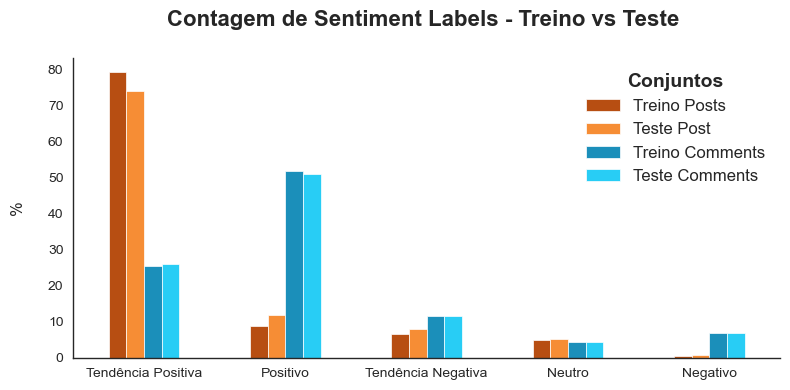

In [21]:
# Criar um gráfico de barras com as contagens das labels do treino e teste lado a lado
fig, ax = plt.subplots(figsize=(8,4))

# Criar uma lista de 4 cores diferentes para treino e teste
colors = ['#b74e12', '#F68D35', '#1b8fba', '#28CDF5']

# Ordenar as barras por valor
labels_df.plot(kind='bar', 
               color=colors, 
               ax=ax)

# Adicionar rótulos dos eixos e título
plt.xlabel('')
plt.ylabel('%\n')
plt.title('Contagem de Sentiment Labels - Treino vs Teste \n', fontsize=16, fontweight='bold')

# Adicionar legenda
legend_properties = {'weight':'bold', 'size':'14'}
ax.legend(['Treino Posts', 'Teste Post', 'Treino Comments', 'Teste Comments'], 
          title='Conjuntos', title_fontproperties=legend_properties, fontsize='12', loc='upper right',frameon=False)

# Ajustar os rótulos dos nomes das labels no eixo x
plt.xticks(rotation=0, ha='center', rotation_mode='anchor')

sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/8_Barras Resposta da Operadora.svg",format='svg',dpi=1200)
plt.show()

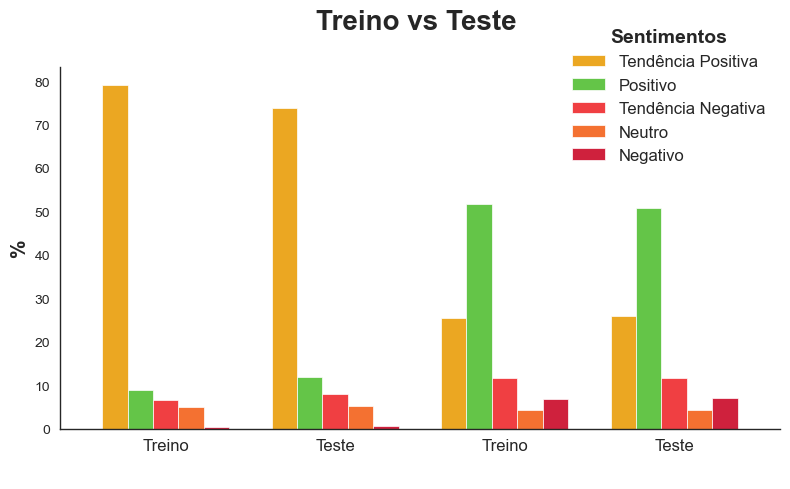

In [77]:
# Paleta de Cores para Sentimentos - Gráficos
sentiment_colors = {'Positivo': '#64C548', 'Tendência Positiva': '#EBA722',
                    'Neutro': '#F47131', 'Tendência Negativa': '#F03F42', 'Negativo': '#CF213D'}

# Criar um gráfico de barras
fig, ax = plt.subplots(figsize=(8,5))

# Ordenar as barras por valor e plotar
labels_df.T.plot(kind='bar', 
                 color=sentiment_colors, 
                 width = 0.75,
                 ax=ax)

# Adicionar rótulos dos eixos e título
plt.xlabel(' ', fontweight='bold', fontsize=16)
plt.ylabel('%', fontweight='bold', fontsize=15)
plt.title('Treino vs Teste \n', fontsize=20, fontweight='bold')

# Adicionar legenda
legend_properties = {'weight': 'bold', 'size': '14'}
plt.legend(title='Sentimentos', title_fontproperties=legend_properties, bbox_to_anchor=(1, 1.15),
           fontsize='12', loc='upper right', frameon=False)

# Ajustar os rótulos dos nomes das labels no eixo x
plt.xticks(ticks=range(len(labels_df.columns)), labels=['Treino', 'Teste', 'Treino', 'Teste'],
           rotation=0, ha='center', rotation_mode='anchor', fontsize = 12)

sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/8_Barras Resposta da Operadora_PPT.svg", format='svg', dpi=1200)
plt.show()

---

### 🔢 Teste Estatístico

Seja $S/T$ os $Sentimentos$ e $Tópicos$ em estudo e $D_1$ o *dataset* de treino e $D_2$ de teste:

- $X = D_1^{\;S/T}$: Sentimentos/Tópicos no dataset de **Treino**

- $Y = D_2^{\;S/T}$  Sentimentos/Tópicos no dataset de **Teste**

#### Hipóteses em teste

- $H_0:$ O resultados do treino **são independentes** dos de teste [$D_1^{S/T}\; \neq \;D_2^{S/T}$]

- $H_1:$ Existe relacionamento entre os resultados de treino e teste [$D_1^{S/T}\; = \;D_2^{S/T}$]

ou, teoricamente,

- $H_0:\forall(i, j) \in\{1: r\} \times\{1: c\}: p_{i j}=p_{i .} \times p_{. j}$

- $H_1: \exists(i, j) \in\{1: r\} \times\{1: c\}: p_{i j} \neq p_{i .} \times p_{\cdot j}$

---

#### Teste Qui-Quadrado

**Estatística de teste**

$$E T=\sum_{i=1}^r \sum_{j=1}^c \frac{\left(o_{i j}-e_{i j}\right)^2}{e_{i j}} \; \dot\sim \; \chi_{(r-1)(c-1)}^2$$

Sendo ambas variáveis fatores, o estudo do relacionamento entre elas será feito através da análise do respetivo
cruzamento (tabela de contingência), com a subsequente aplicação do **Teste Qui-quadrado**.

### Teste Feito no R

#### Publicações

    > chi2_Sentiments

        Pearson's Chi-squared test

    data:  tab_combined_sentiments
    X-squared = 2.8736, df = 4, p-value = 0.5792


#### Comentários

    > chi2_Sentiments

        Pearson's Chi-squared test

    data:  tab_combined_sentiments
    X-squared = 1.8609, df = 4, p-value = 0.7613

<br>

> Como $p-value = 0.58\;/\;0.76 > \alpha$ de referência ($\alpha=0.05$), então não se rejeita $H_0$.

Ou seja, **não existe** evidência estatística que revele associação o treino e o teste.

- Isto significa que não existem divergências significativas entre as frequências observadas e as frequências esperadas (ou seja, o que estamos a observar numa situação de independência). 

- Quer por isto dizer que os resultados são independentes da amostra e por isso o modelo generaliza com confiança.

--- 

Assim, o modelo mostra-se capaz de classificar os dados sem enviesar os resultados.

[**Nota:** $\alpha = 0.05$ é com uma confiança de $95\%$]

---

### 🔴🔵⚫ Tópicos

In [47]:
# Criar um DataFrame com as contagens e percentagens das labels do treino e teste
labels_df = pd.DataFrame()

# Contagens e percentagens das labels do treino para mDeBERTa_post_topic_label_1
# labels_df['Treino mDeBERTa_post_topic_label_1 (n)'] = dtf_train_posts['mDeBERTa_post_topic_label_1'].value_counts()
labels_df['Treino | post_topic_label_1 (%)'] = round(dtf_train_posts['mDeBERTa_post_topic_label_1'].value_counts(normalize=True) * 100,1)

# Contagens e percentagens das labels do teste para mDeBERTa_post_topic_label_1
# labels_df['Teste mDeBERTa_post_topic_label_1 (n)'] = dtf_test_posts['mDeBERTa_post_topic_label_1'].value_counts()
labels_df['Teste | post_topic_label_1 (%)'] = round(dtf_test_posts['mDeBERTa_post_topic_label_1'].value_counts(normalize=True) * 100,1)

# Contagens e percentagens das labels do treino para mDeBERTa_comment_topic_label_1
# labels_df['Treino mDeBERTa_comment_topic_label_1 (n)'] = dtf_train_comments['mDeBERTa_comment_topic_label_1'].value_counts()
labels_df['Treino | comment_topic_label_1 (%)'] = round(dtf_train_comments['mDeBERTa_comment_topic_label_1'].value_counts(normalize=True) * 100,1)

# Contagens e percentagens das labels do teste para mDeBERTa_comment_topic_label_1
# labels_df['Teste mDeBERTa_comment_topic_label_1 (n)'] = dtf_test_comments['mDeBERTa_comment_topic_label_1'].value_counts()
labels_df['Teste | comment_topic_label_1 (%)'] = round(dtf_test_comments['mDeBERTa_comment_topic_label_1'].value_counts(normalize=True) * 100,1)

labels_df.index.name = None
labels_df.head(5)              # Top5 Tópicos

Treino | post_topic_label_1 (%)  \
Tecnologia                                19.2   
Redes Sociais                             19.1   
Comunicação                               12.5   
Promoções                                  7.5   
Filme/Série                                5.4   

               Teste | post_topic_label_1 (%)  \
Tecnologia                               17.4   
Redes Sociais                            18.1   
Comunicação                              13.2   
Promoções                                 6.9   
Filme/Série                               4.2   

               Treino | comment_topic_label_1 (%)  \
Tecnologia                                    4.1   
Redes Sociais                                 2.8   
Comunicação                                  16.1   
Promoções                                     2.0   
Filme/Série                                   2.5   

               Teste | comment_topic_label_1 (%)  
Tecnologia                                   4.3  
Redes Sociais                                3.0  
Comunicação                                 16.3  
Promoções                                    2.0  
Filme/Série                                  2.5

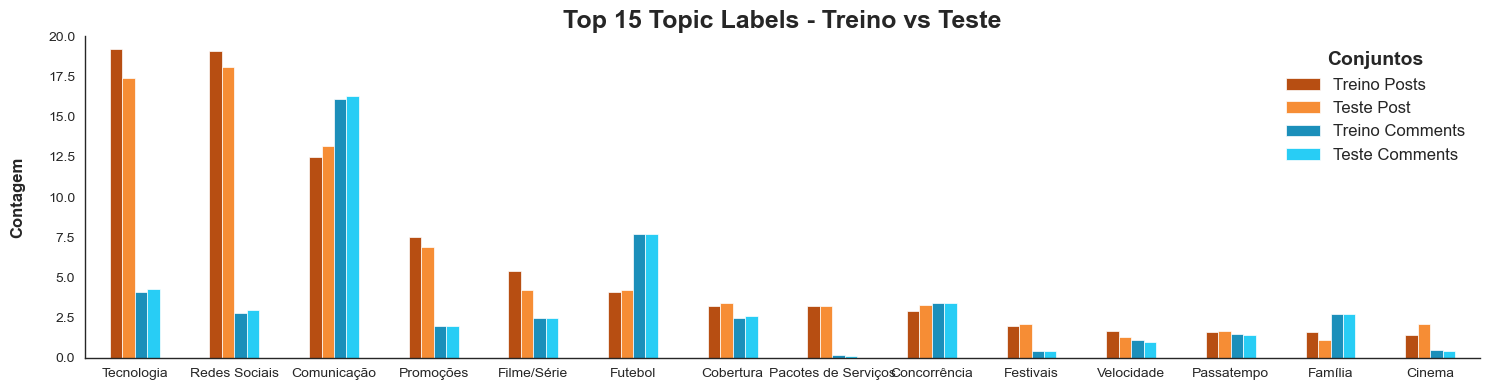

In [50]:
import matplotlib.colors as mcolors
# Criar um gráfico de barras com as contagens das labels do treino e teste lado a lado
fig, ax = plt.subplots(figsize=(15,4))

# Criar uma lista de 4 cores diferentes para treino e teste
colors = ['#b74e12', '#F68D35', '#1b8fba', '#28CDF5']

# Ordenar as barras por valor
# labels_df.sort_values(by=['Treino | post_topic_label_1 (%)', 'Teste | post_topic_label_1 (%)'], ascending=False).plot(kind='bar', color=colors, ax=ax)
labels_df.sort_values(by=['Treino | post_topic_label_1 (%)', 'Teste | post_topic_label_1 (%)'], ascending=False).head(14).plot(kind='bar', color=colors, ax=ax)

# Adicionar rótulos dos eixos e título
plt.xlabel('')
plt.ylabel('Contagem\n', fontweight='bold')
plt.ylim(0, 20)
# plt.title('Contagem de Labels - Treino vs Teste', fontsize=18, fontweight='bold')
plt.title('Top 15 Topic Labels - Treino vs Teste', fontsize=18, fontweight='bold')

# Adicionar legenda
legend_properties = {'weight':'bold', 'size':'14'}
ax.legend(['Treino Posts', 'Teste Post', 'Treino Comments', 'Teste Comments'], 
          title='Conjuntos', title_fontproperties=legend_properties, fontsize='12', loc='upper right',frameon=False)

# Ajustar os rótulos dos nomes das labels no eixo x
plt.xticks(rotation=0, ha='center', rotation_mode='anchor')
# plt.xticks(rotation=25, ha='right', rotation_mode='anchor')

sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/8_Barras Resposta da Operadora.svg",format='svg',dpi=1200)
plt.show()

In [42]:
# Tabela com os 5 Hot Tópicos
# Agrupar dados pelos tópicos e contar o número de comentários para cada tópico
top_topics = Facebook_Comments_Analysis['mDeBERTa_comment_topic_label_1'].value_counts().reset_index()
top_topics.columns = ['Tópico', 'n']

# Calcular a porcentagem de comentários para cada tópico
total_comments = top_topics['n'].sum()
top_topics['%'] = round((top_topics['n'] / total_comments) * 100,1)

# Selecionar os 5 tópicos mais comentados
top_5_topics = top_topics.head(5)
top_5_topics = top_5_topics.set_index('Tópico')
display_side_by_side(top_5_topics,
                     super_title="Tabela do Top 5 <i>Hot Topics</i>",
                     titles=[" "]
                    )

Tabela do Top 5 Hot Topics 
 
 
 
 n 
 % 
 
 
 Tópico 
 
 
 
 
 
 
 Comunicação 
 31505 
 16.2 
 
 
 Qualidade 
 25893 
 13.3 
 
 
 Futebol 
 14946 
 7.7 
 
 
 Problemas da Sociedade 
 13668 
 7.0 
 
 
 Política 
 12246 
 6.3

---

### 🔢 Teste Estatístico

#### Teste Qui$^2$ --------- MAL

### Teste Feito no R

#### Publicações

    > chi2_topics

        Pearson's Chi-squared test

    data:  tab_combined_topics
    X-squared = 34.118, df = 45, p-value = 0.8817


#### Comentários

    > chi2_topics

        Pearson's Chi-squared test

    data:  tab_combined_topics
    X-squared = 45.296, df = 50, p-value = 0.6623

<br><br>

> Conclusões $=$ ao do **Sentimento**

---

 * 🔢 Testes Estatísticos [R_Evaluation.r](./R_Evaluation.R)

---

# <a class='anchor' id='6'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>6 | Deployment</b></h1></center>
</div>

 * 📊 Dashboard [pcfad_chatmeter_streamlit.py](./Dashboard/pcfad_chatmeter_streamlit.py)

In [25]:
# print(Facebook_Comments_Analysis.info())
# Facebook_PCU_Analysis.columns

In [1]:
# # Colunas a eliminar
# colunas_del = [
#     'post_day', 'post_month', 'post_year', 'post_hour', 'post_language',
#     'comment_date', 'comment_day_ago', 'comment_language', 'user_current_city', 'user_hometown', 'user_city_not_portugal'
# ]

In [27]:
# Eliminar colunas desnecessárias
# Facebook_PCU_Analysis = Facebook_PCU_Analysis.drop(columns=colunas_del)

# Guardar o dataset resultante como um arquivo CSV
# Facebook_PCU_Analysis.to_csv('Datasets_Vodafone/Facebook_PCU_Analysis.csv', sep='|', encoding='utf-8', index=False)

# Guardar o dataset resultante como um arquivo Pickle
# Facebook_PCU_Analysis.to_pickle('Datasets_Vodafone/Facebook_PCU_Analysis.pkl')

```Python
# Dividir o DataFrame em partes menores
num_parts = 3  # Defina o número de partes
chunk_size = len(Facebook_PCU_Analysis) // num_parts
chunks = [Facebook_PCU_Analysis[i:i + chunk_size] for i in range(0, len(Facebook_PCU_Analysis), chunk_size)]

# Salvar as partes como arquivos separados
for i, chunk in enumerate(chunks):
    chunk.to_pickle(f'Datasets_Vodafone/Facebook_PCU_Analysis_part_{i+1}.pkl')
```

---

> Para tornar a App mais rápida a fazer o **Mapa Interativo**, utilizou-se o código que se segue para simplicar o ficheiro GeoJSON

```Python
from shapely.geometry import shape
from shapely.ops import unary_union
import geopandas as gpd

# Função para simplificar geometrias em um DataFrame GeoPandas
def simplify_geometries(gdf, tolerance=0.0001):
    """
    Função para simplificar geometrias em um DataFrame GeoPandas.
    
    Args:
        gdf (GeoDataFrame): O DataFrame GeoPandas contendo as geometrias.
        tolerance (float): A tolerância para a simplificação. Quanto menor o valor, mais precisa será a simplificação.
    
    Returns:
        GeoDataFrame: O DataFrame GeoPandas com as geometrias simplificadas.
    """
    # Copiar o DataFrame GeoPandas para evitar modificar o original
    gdf_simplified = gdf.copy()
    
    # Convertendo a coluna de geometria para geometrias válidas
    gdf_simplified['geometry'] = gdf_simplified['geometry'].apply(shape)
    
    # Simplificar cada geometria no DataFrame
    gdf_simplified['geometry'] = gdf_simplified['geometry'].apply(lambda geom: geom.simplify(tolerance, preserve_topology=True))
    
    return gdf_simplified

# Carregar as coordenadas de Portugal no Geopandas
map_dataframe = gpd.read_file('Datasets_Vodafone/Auxiliares/georef-portugal-freguesia.geojson')

# Simplificar as geometrias do DataFrame GeoPandas
map_dataframe_simplified = simplify_geometries(map_dataframe)

# Salvar o DataFrame GeoPandas simplificado em um novo arquivo GeoJSON
map_dataframe_simplified.to_file('Datasets_Vodafone/Auxiliares/georef-portugal-freguesia-simplified.geojson', driver='GeoJSON')

# Exibir as informações do DataFrame GeoPandas simplificado
map_dataframe_simplified.head()
```

---